In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

# Helper libraries
import datetime
import time
from numpy.random import seed
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
tf.debugging.set_log_device_placement(False)

from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN,RNN, LSTM
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.datasets import imdb

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [101]:
(data, labels), (_, _) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=None, skip_top=0, maxlen=None, 
    seed=113, start_char=1, oov_char=2, index_from=3)

C:\Users\brown\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\brown\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [102]:
print(f"There are {len(data)} IMDb Film Reviews with {len(labels)} labels.") 
print(f"There are {len(set(labels))} different label categories.")

There are 25000 IMDb Film Reviews with 25000 labels.
There are 2 different label categories.


In [103]:
classes = {0:'Negative',1:'Positive'}

In [104]:
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [105]:
for x in range(3):

    print("Review:"," ".join([reverse_word_index.get(i-3,"#") for i in data[x]]))
    print("Label:",classes[labels[x]])
    print()

Review: # this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and s

In [106]:
indexes = [word for doc in data for word in doc]
print(f"There are {len(indexes)} words in the data corpus")

There are 5967841 words in the data corpus


In [107]:
corpus = [reverse_word_index.get(index,'?') for index in indexes]
corpus_freq = Counter(corpus).most_common()
corpus_freq[:50]

[('of', 336148),
 ('to', 164097),
 ('is', 163040),
 ('br', 145847),
 ('in', 135708),
 ('it', 107313),
 ('i', 101871),
 ('this', 93934),
 ('that', 79058),
 ('was', 77142),
 ('as', 75974),
 ('for', 69787),
 ('with', 48195),
 ('movie', 46927),
 ('but', 44335),
 ('film', 44122),
 ('on', 43564),
 ('not', 42594),
 ('you', 39095),
 ('are', 34188),
 ('his', 30610),
 ('have', 29877),
 ('he', 29425),
 ('be', 29366),
 ('one', 27726),
 ('all', 26952),
 ('at', 26948),
 ('by', 26513),
 ('the', 25000),
 ('an', 23953),
 ('they', 23507),
 ('who', 22539),
 ('so', 21538),
 ('from', 21139),
 ('like', 20599),
 ('her', 20586),
 ('or', 20494),
 ('just', 20272),
 ('about', 18407),
 ("it's", 17994),
 ('out', 17759),
 ('has', 17371),
 ('if', 17153),
 ('some', 17092),
 ('what', 16790),
 ('there', 16790),
 ('good', 15743),
 ('more', 15735),
 ('when', 15349),
 ('very', 15100)]

In [114]:
uniques = [word for word,freq in Counter(corpus).items() if freq == 1]
print(f"There are {len(uniques)} words that occur just once in the data corpus totaling 1638886 words")

There are 36577 words that occur just once in the data corpus totaling 1638886 words


In [115]:
corpus_freq[:-26:-1]

[('johnnys', 1),
 ('geezers', 1),
 ('isolative', 1),
 ('legitimates', 1),
 ('caisse', 1),
 ("'eliminated'", 1),
 ('merritt', 1),
 ("'willy", 1),
 ('proyas', 1),
 ("'giants'", 1),
 ("artimisia's", 1),
 ('worldy', 1),
 ('best\x97but', 1),
 ('protractor', 1),
 ('manner\x85', 1),
 ('amit', 1),
 ("tong's", 1),
 ('1870', 1),
 ('arjuna', 1),
 ('nickson', 1),
 ('examp', 1),
 ("'lauren'", 1),
 ('epic\x85', 1),
 ("sherman's", 1),
 ("bennett'", 1)]

In [117]:
unique_indexes = list(set(indexes))
print(f"There are {len(unique_indexes)} words in the data corpus that represent the vocabulary")

There are 88585 words in the data corpus that represent the vocabulary


In [118]:
uniques[:25]

['gretal',
 'troble',
 'cavil',
 'hiyao',
 'freshened',
 'dedications',
 'mayfair',
 '498',
 'zigfield',
 'wrongdoing',
 "meloni's",
 'bullit',
 'stygian',
 "'menaikkan'",
 'glitched',
 "gods'",
 "'daring'",
 'enrapture',
 "shep'",
 'evolutions',
 'apricorn',
 'zeland',
 'hittite',
 "pair''",
 "'count'"]

In [119]:
doc_sizes = ([len(lst) for lst in data]) # num of words in each document
print(f"Number of words in IMDb Reviews: {min(doc_sizes)} to {max(doc_sizes)}")
print(f"There are a total of {sum(doc_sizes)} words in the data corpus")

Number of words in IMDb Reviews: 11 to 2494
There are a total of 5967841 words in the data corpus


Text(0, 0.5, 'Number of IMDb Reviews')

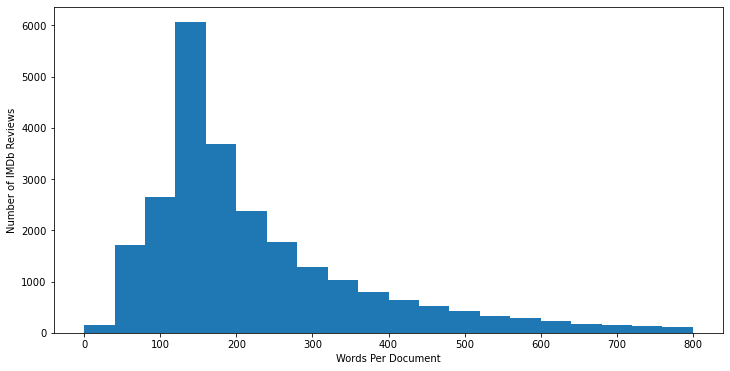

In [123]:
plt.figure(figsize=[12,6])
plt.hist(doc_sizes, bins=20,range = (0,800))
plt.xlabel("Words Per Document")
plt.ylabel("Number of IMDb Reviews")

In [173]:
train_data_sizes = [len(s) for s in X_train]
test_data_sizes = [len(s) for s in X_test]
print(f"There are {sum(train_data_sizes)} words in the training data corpus")
print(f"There are {sum(test_data_sizes)} words in the test data corpus")

There are 4885462 words in the training data corpus
There are 1231045 words in the test data corpus


# Models

## Dense Neural Network

In [108]:
#IMDb data has 25,000 already designated for training/testing
#Will join both sets then perform manual 80/20 split
voc_size=10000

(train_data, train_labels),(test_data, test_labels) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=voc_size, skip_top=26, maxlen=300,
    seed=113, start_char=1, oov_char=2, index_from=3)

X = np.append(train_data,test_data)
y = np.append(train_labels,test_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(y_train.shape, y_test.shape)
print()
print('Word Sequence:',X_train[0])
print('Label:',y_train[0])
#X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
#X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

(30800,) (7701,)

Word Sequence: [2, 2, 114, 2, 2, 2, 2, 2, 2732, 2, 55, 1564, 185, 250, 271, 2, 2383, 2, 1787, 2, 2, 1007, 2, 41, 922, 8827, 1720, 747, 153, 908, 50, 59, 892, 56, 2, 41, 8827, 1138, 1432, 2, 295, 36, 2106, 2, 32, 2, 1370, 41, 799, 435, 2, 3751, 2, 1007, 413, 788, 2, 2, 2, 51, 166, 2, 2, 38, 318, 2, 2, 752, 2, 1763, 114, 26, 2, 307, 5665, 2, 2, 105, 261, 2, 922, 8827, 1432, 2, 2, 2440, 46, 4934, 29, 47, 3143, 7843, 1515, 1553, 2, 1048, 6260, 2, 261, 2, 922, 799, 37, 75, 67, 2, 2183, 5519, 134, 7843, 59, 152, 28, 2, 281, 2, 2, 42, 2972, 2, 89, 76, 2, 99, 76, 2, 261, 2, 1155, 250, 2, 2, 4295, 2, 41, 8827, 1757, 59, 3751, 659, 2, 2124, 2, 393, 2, 192, 2, 41, 799, 2, 64, 2, 1280, 250, 103, 32, 2, 2, 2, 91, 318, 561, 2, 2, 2, 2, 54, 2, 185, 250, 2, 2, 8827, 1432, 417, 570, 997, 68, 3224, 2, 257, 85, 2, 191, 2283, 126, 319, 53, 307, 1301, 731, 2, 2, 2, 2, 2, 2, 2, 2, 2, 32, 134, 771, 2, 2, 2, 371, 307, 2, 2, 2, 2, 30, 2, 2, 2, 30, 110, 174, 2, 174, 790, 46, 2, 158]
Label: 1


In [113]:
len(train_data)+len(test_data)

38501

In [111]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([19346, 19155], dtype=int64))

## Dense Neural Network | One Hot Encoding

In [114]:
def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train_sparse = vectorize_sequences(X_train)
X_test_sparse = vectorize_sequences(X_test)

In [117]:
len(X_train_sparse[0])

10000

In [37]:
print(X_train_sparse.shape, X_test_sparse.shape)

(30800, 10000) (7701, 10000)


In [38]:
model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_346 (Dense)            (None, 16)                160016    
_________________________________________________________________
dense_347 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_348 (Dense)            (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [39]:
dnn_onehot_results = pd.DataFrame(columns=['Model','Layers','Size','Dropout','Time','Test Accuracy'])

Layers: 1
---------
Accuracy: 0.8836515
Total Time (s): 35.96542239189148

Model Loss Trend
----------------


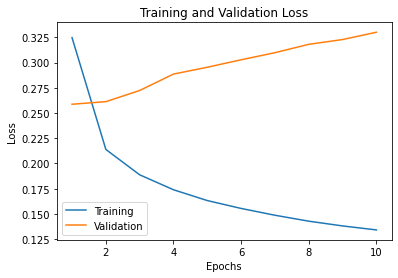


INFO:tensorflow:Assets written to: DNN_OneHot_1Layers_8Size\assets

Layers: 1
---------
Accuracy: 0.88871574
Total Time (s): 35.71124577522278

Model Loss Trend
----------------


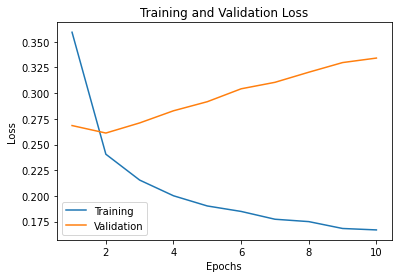


INFO:tensorflow:Assets written to: DNN_OneHot_1Layers_8Size_Dropout\assets

Layers: 1
---------
Accuracy: 0.8837813
Total Time (s): 37.477826833724976

Model Loss Trend
----------------


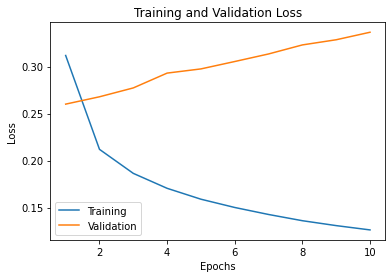


INFO:tensorflow:Assets written to: DNN_OneHot_1Layers_16Size\assets

Layers: 1
---------
Accuracy: 0.8878068
Total Time (s): 35.898080587387085

Model Loss Trend
----------------


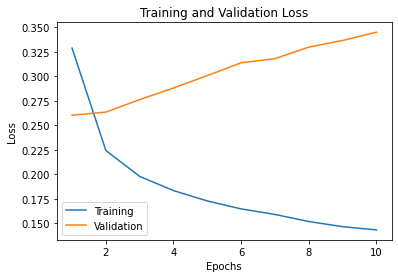


INFO:tensorflow:Assets written to: DNN_OneHot_1Layers_16Size_Dropout\assets

Layers: 1
---------
Accuracy: 0.88235295
Total Time (s): 36.58298587799072

Model Loss Trend
----------------


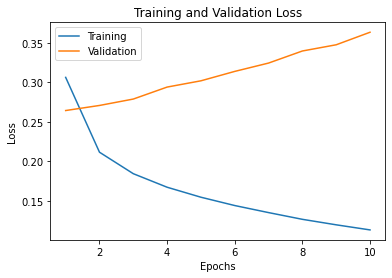


INFO:tensorflow:Assets written to: DNN_OneHot_1Layers_32Size\assets

Layers: 1
---------
Accuracy: 0.88559926
Total Time (s): 36.98094344139099

Model Loss Trend
----------------


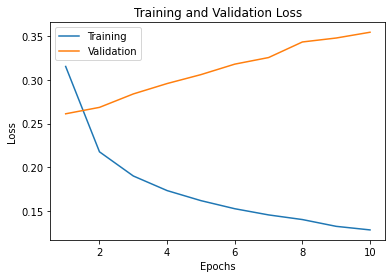


INFO:tensorflow:Assets written to: DNN_OneHot_1Layers_32Size_Dropout\assets

Layers: 2
---------
Accuracy: 0.8846903
Total Time (s): 35.92453098297119

Model Loss Trend
----------------


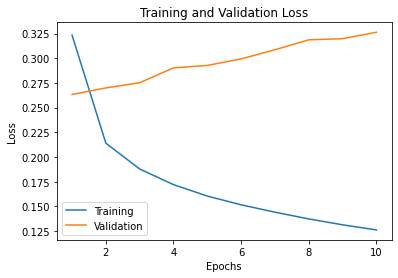


INFO:tensorflow:Assets written to: DNN_OneHot_2Layers_8Size\assets

Layers: 2
---------
Accuracy: 0.8897546
Total Time (s): 37.187650203704834

Model Loss Trend
----------------


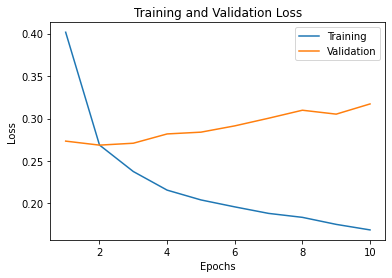


INFO:tensorflow:Assets written to: DNN_OneHot_2Layers_8Size_Dropout\assets

Layers: 2
---------
Accuracy: 0.880535
Total Time (s): 37.55101704597473

Model Loss Trend
----------------


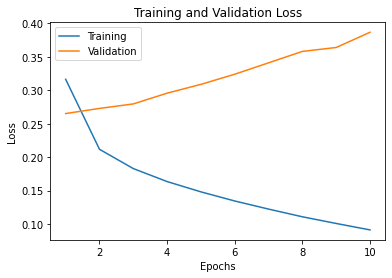


INFO:tensorflow:Assets written to: DNN_OneHot_2Layers_16Size\assets

Layers: 2
---------
Accuracy: 0.88572913
Total Time (s): 37.759302854537964

Model Loss Trend
----------------


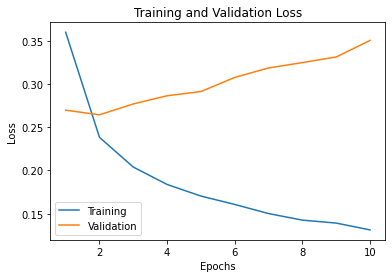


INFO:tensorflow:Assets written to: DNN_OneHot_2Layers_16Size_Dropout\assets

Layers: 2
---------
Accuracy: 0.8722244
Total Time (s): 38.585429668426514

Model Loss Trend
----------------


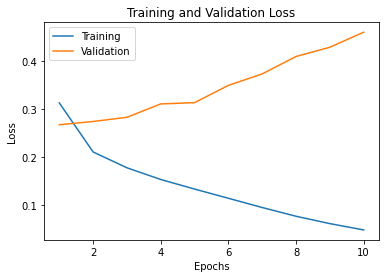


INFO:tensorflow:Assets written to: DNN_OneHot_2Layers_32Size\assets

Layers: 2
---------
Accuracy: 0.88430077
Total Time (s): 39.70606184005737

Model Loss Trend
----------------


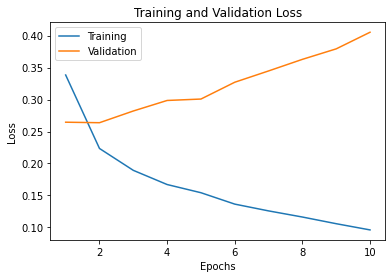


INFO:tensorflow:Assets written to: DNN_OneHot_2Layers_32Size_Dropout\assets



In [40]:
for layer in [1,2]:
    
    for size in [8,16,32]:
        
        for dropout in [0,0.2]:
    
            start_time = time.time()

            print('Layers:',layer)
            print('---------')

            seed(5)
            tf.random.set_seed(5)

            model = models.Sequential()
            
            for layer_n in range(0,layer):
                model.add(Dense(size, activation='relu', input_shape=(10000,)))
            
                if dropout != 0:
                    model.add(Dropout(dropout))
                
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

            history = model.fit(X_train_sparse, y_train, epochs=10, validation_split=0.2, verbose=False)

            total_time = time.time() - start_time

            loss, accuracy = model.evaluate(X_test_sparse, y_test, verbose=0)

            print('Accuracy:',accuracy)
            print('Total Time (s):',total_time)
            print()

            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']

            print('Model Loss Trend')
            print('----------------')
            plot = plt.plot(range(1, len(acc) + 1), history.history['loss'], label = 'Training')
            plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_loss'], label = 'Validation')
            plot = plt.title('Training and Validation Loss')
            plot = plt.xlabel('Epochs')
            plot = plt.ylabel('Loss')
            plot = plt.legend()
            plt.show()
            print()

            if dropout == 0:
                model_name = 'DNN_OneHot_{}Layers_{}Size'.format(layer, size)
            else:
                model_name = 'DNN_OneHot_{}Layers_{}Size_Dropout'.format(layer, size)

            model.save(model_name)
            print()

            dnn_onehot_results = dnn_onehot_results.append(
                {'Model':model_name,
                 'Layers':layer,
                 'Size':size,
                 'Dropout':dropout,
                 'Time':total_time,
                 'Test Accuracy':accuracy}, ignore_index=True)

In [42]:
dnn_onehot_results.to_csv('DNN_Onehot_Results.csv')
dnn_onehot_results

,Model,Layers,Size,Dropout,Time,Test Accuracy
0,DNN_OneHot_1Layers_8Size,1,8,0,35.965422,0.883651
1,DNN_OneHot_1Layers_8Size_Dropout,1,8,0.2,35.711246,0.888716
2,DNN_OneHot_1Layers_16Size,1,16,0,37.477827,0.883781
3,DNN_OneHot_1Layers_16Size_Dropout,1,16,0.2,35.898081,0.887807
4,DNN_OneHot_1Layers_32Size,1,32,0,36.582986,0.882353
5,DNN_OneHot_1Layers_32Size_Dropout,1,32,0.2,36.980943,0.885599
6,DNN_OneHot_2Layers_8Size,2,8,0,35.924531,0.884690
7,DNN_OneHot_2Layers_8Size_Dropout,2,8,0.2,37.187650,0.889755
8,DNN_OneHot_2Layers_16Size,2,16,0,37.551017,0.880535
9,DNN_OneHot_2Layers_16Size_Dropout,2,16,0.2,37.759303,0.885729


## Dense Neural Network | 299 Dimension Sequential Vector

In [4]:
X_train_seq = preprocessing.sequence.pad_sequences(X_train, maxlen=299)
X_test_seq = preprocessing.sequence.pad_sequences(X_test, maxlen=299)

In [5]:
X_train_seq.shape

(30800, 299)

In [6]:
model = models.Sequential()
model.add(Embedding(input_dim = voc_size, output_dim = 10, input_length = X_train_seq.shape[1]))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 299, 10)           100000    
_________________________________________________________________
flatten (Flatten)            (None, 2990)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2991      
Total params: 102,991
Trainable params: 102,991
Non-trainable params: 0
_________________________________________________________________


In [7]:
dnn_embed_results = pd.DataFrame(columns=['Model','Embed_Dims','Layers','Size','Dropout','Time','Test Accuracy'])

Word Embedding Dimensions: 10
Layers: 0
Layer Size: 0
Dropout Rate: 0

Accuracy: 0.88832617
Total Time (s): 35.629292011260986

Model Loss Trend
----------------


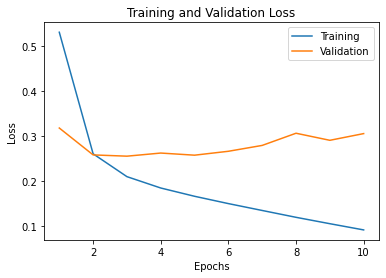


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: DNN_Embed_10Dims_0Layers_0Size\assets

Word Embedding Dimensions: 10
Layers: 1
Layer Size: 8
Dropout Rate: 0

Accuracy: 0.84755224
Total Time (s): 36.19801068305969

Model Loss Trend
----------------


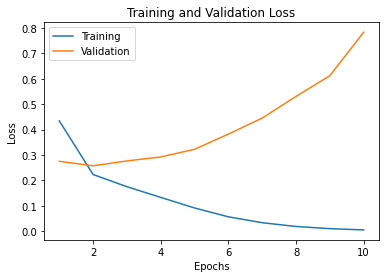


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_1Layers_8Size\assets

Word Embedding Dimensions: 10
Layers: 1
Layer Size: 8
Dropout Rate: 0.2

Accuracy: 0.8662511
Total Time (s): 36.27557444572449

Model Loss Trend
----------------


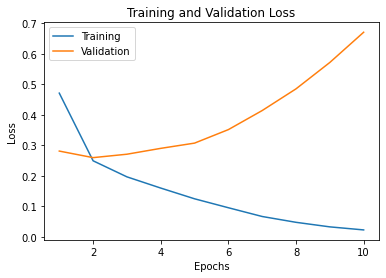


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_1Layers_8Size_Dropout\assets

Word Embedding Dimensions: 10
Layers: 1
Layer Size: 16
Dropout Rate: 0

Accuracy: 0.8479418
Total Time (s): 36.26234006881714

Model Loss Trend
----------------


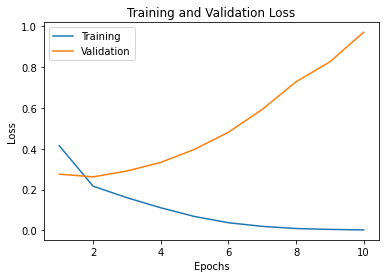


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_1Layers_16Size\assets

Word Embedding Dimensions: 10
Layers: 1
Layer Size: 16
Dropout Rate: 0.2

Accuracy: 0.85845995
Total Time (s): 37.50797152519226

Model Loss Trend
----------------


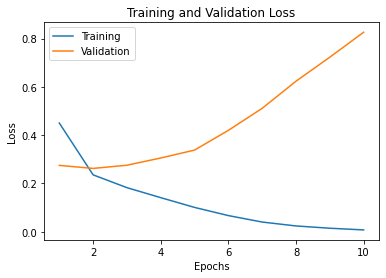


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_1Layers_16Size_Dropout\assets

Word Embedding Dimensions: 10
Layers: 1
Layer Size: 32
Dropout Rate: 0

Accuracy: 0.8419686
Total Time (s): 36.43455410003662

Model Loss Trend
----------------


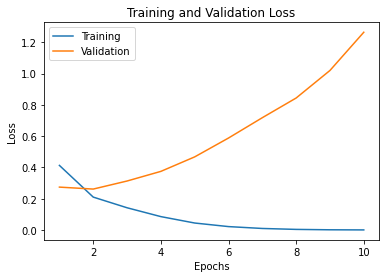


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_1Layers_32Size\assets

Word Embedding Dimensions: 10
Layers: 1
Layer Size: 32
Dropout Rate: 0.2

Accuracy: 0.845085
Total Time (s): 36.209808111190796

Model Loss Trend
----------------


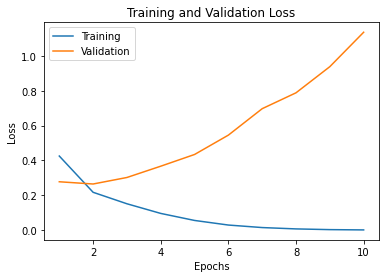


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_1Layers_32Size_Dropout\assets

Word Embedding Dimensions: 10
Layers: 2
Layer Size: 8
Dropout Rate: 0

Accuracy: 0.84962994
Total Time (s): 37.87240934371948

Model Loss Trend
----------------


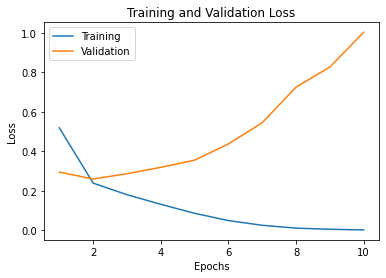


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_2Layers_8Size\assets

Word Embedding Dimensions: 10
Layers: 2
Layer Size: 8
Dropout Rate: 0.2

Accuracy: 0.8671601
Total Time (s): 37.36763381958008

Model Loss Trend
----------------


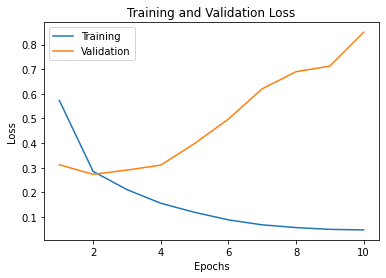


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_2Layers_8Size_Dropout\assets

Word Embedding Dimensions: 10
Layers: 2
Layer Size: 16
Dropout Rate: 0

Accuracy: 0.83482665
Total Time (s): 37.47940135002136

Model Loss Trend
----------------


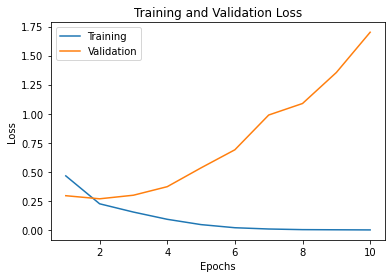


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_2Layers_16Size\assets

Word Embedding Dimensions: 10
Layers: 2
Layer Size: 16
Dropout Rate: 0.2

Accuracy: 0.8635242
Total Time (s): 37.68416976928711

Model Loss Trend
----------------


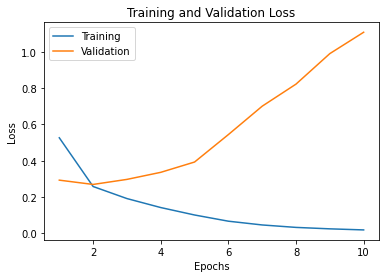


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_2Layers_16Size_Dropout\assets

Word Embedding Dimensions: 10
Layers: 2
Layer Size: 32
Dropout Rate: 0

Accuracy: 0.84677315
Total Time (s): 37.62029814720154

Model Loss Trend
----------------


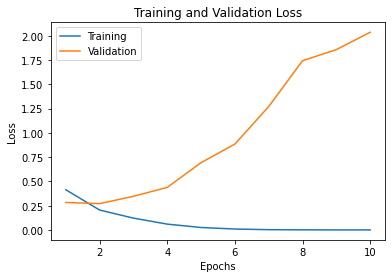


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_2Layers_32Size\assets

Word Embedding Dimensions: 10
Layers: 2
Layer Size: 32
Dropout Rate: 0.2

Accuracy: 0.8567718
Total Time (s): 37.97151494026184

Model Loss Trend
----------------


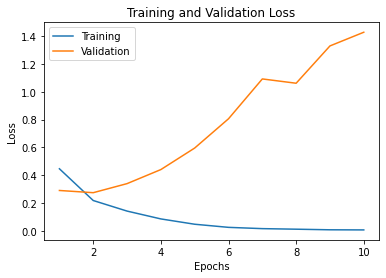


INFO:tensorflow:Assets written to: DNN_Embed_10Dims_2Layers_32Size_Dropout\assets

Word Embedding Dimensions: 25
Layers: 0
Layer Size: 0
Dropout Rate: 0

Accuracy: 0.87871706
Total Time (s): 42.38978362083435

Model Loss Trend
----------------


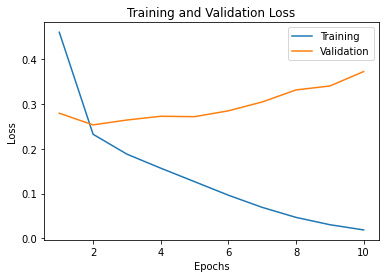


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_0Layers_0Size\assets

Word Embedding Dimensions: 25
Layers: 1
Layer Size: 8
Dropout Rate: 0

Accuracy: 0.84937024
Total Time (s): 43.98611521720886

Model Loss Trend
----------------


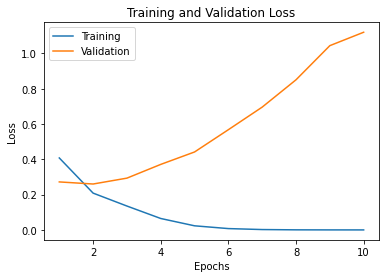


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_1Layers_8Size\assets

Word Embedding Dimensions: 25
Layers: 1
Layer Size: 8
Dropout Rate: 0.2

Accuracy: 0.8632645
Total Time (s): 45.012568950653076

Model Loss Trend
----------------


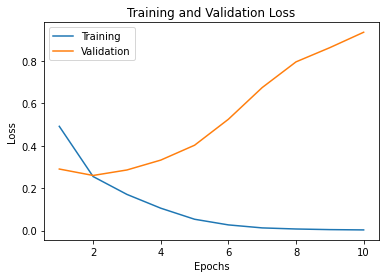


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_1Layers_8Size_Dropout\assets

Word Embedding Dimensions: 25
Layers: 1
Layer Size: 16
Dropout Rate: 0

Accuracy: 0.84872097
Total Time (s): 43.74932408332825

Model Loss Trend
----------------


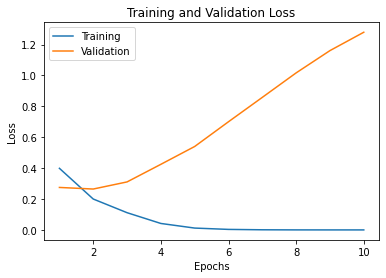


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_1Layers_16Size\assets

Word Embedding Dimensions: 25
Layers: 1
Layer Size: 16
Dropout Rate: 0.2

Accuracy: 0.8574211
Total Time (s): 44.70084881782532

Model Loss Trend
----------------


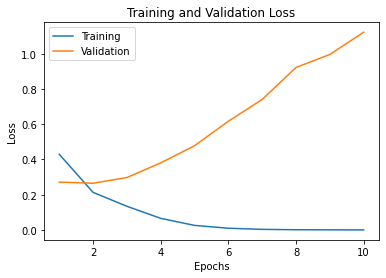


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_1Layers_16Size_Dropout\assets

Word Embedding Dimensions: 25
Layers: 1
Layer Size: 32
Dropout Rate: 0

Accuracy: 0.84417605
Total Time (s): 43.882176876068115

Model Loss Trend
----------------


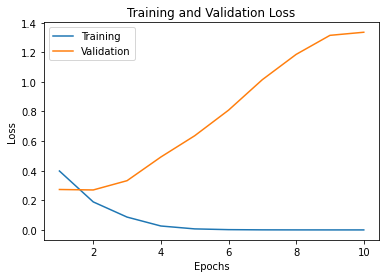


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_1Layers_32Size\assets

Word Embedding Dimensions: 25
Layers: 1
Layer Size: 32
Dropout Rate: 0.2

Accuracy: 0.8563823
Total Time (s): 45.04418325424194

Model Loss Trend
----------------


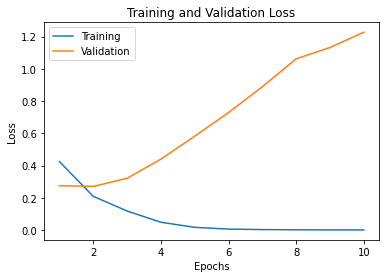


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_1Layers_32Size_Dropout\assets

Word Embedding Dimensions: 25
Layers: 2
Layer Size: 8
Dropout Rate: 0

Accuracy: 0.8454746
Total Time (s): 45.68628239631653

Model Loss Trend
----------------


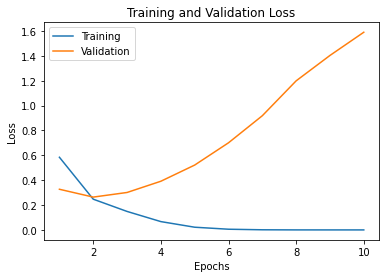


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_2Layers_8Size\assets

Word Embedding Dimensions: 25
Layers: 2
Layer Size: 8
Dropout Rate: 0.2

Accuracy: 0.8633944
Total Time (s): 46.76736235618591

Model Loss Trend
----------------


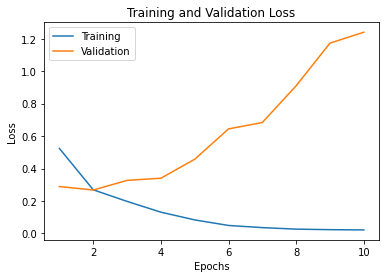


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_2Layers_8Size_Dropout\assets

Word Embedding Dimensions: 25
Layers: 2
Layer Size: 16
Dropout Rate: 0

Accuracy: 0.84975976
Total Time (s): 46.199782848358154

Model Loss Trend
----------------


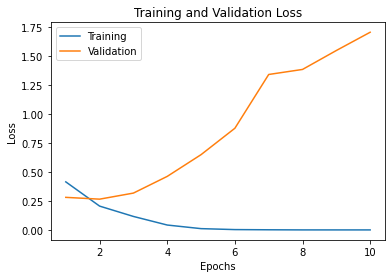


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_2Layers_16Size\assets

Word Embedding Dimensions: 25
Layers: 2
Layer Size: 16
Dropout Rate: 0.2

Accuracy: 0.85820025
Total Time (s): 47.584715127944946

Model Loss Trend
----------------


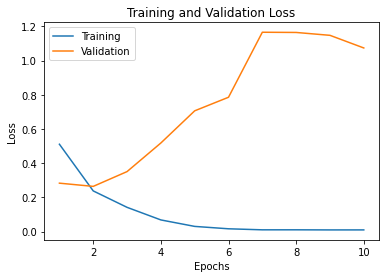


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_2Layers_16Size_Dropout\assets

Word Embedding Dimensions: 25
Layers: 2
Layer Size: 32
Dropout Rate: 0

Accuracy: 0.84625375
Total Time (s): 47.09975075721741

Model Loss Trend
----------------


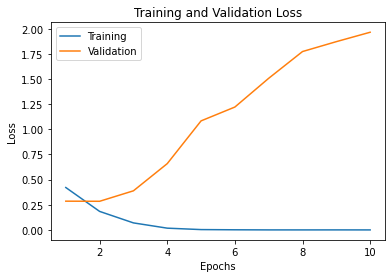


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_2Layers_32Size\assets

Word Embedding Dimensions: 25
Layers: 2
Layer Size: 32
Dropout Rate: 0.2

Accuracy: 0.847812
Total Time (s): 47.027364015579224

Model Loss Trend
----------------


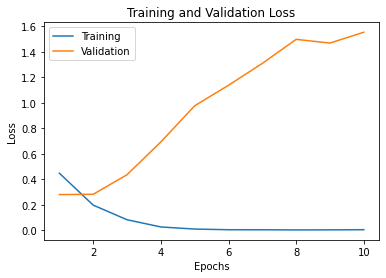


INFO:tensorflow:Assets written to: DNN_Embed_25Dims_2Layers_32Size_Dropout\assets

Word Embedding Dimensions: 50
Layers: 0
Layer Size: 0
Dropout Rate: 0

Accuracy: 0.8754707
Total Time (s): 59.82034707069397

Model Loss Trend
----------------


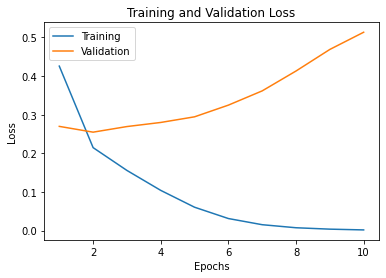


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_0Layers_0Size\assets

Word Embedding Dimensions: 50
Layers: 1
Layer Size: 8
Dropout Rate: 0

Accuracy: 0.8639138
Total Time (s): 62.43583297729492

Model Loss Trend
----------------


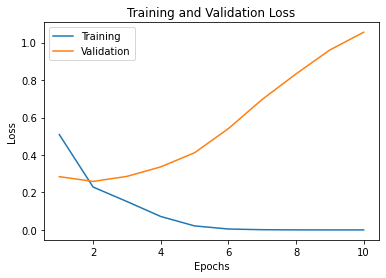


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_1Layers_8Size\assets

Word Embedding Dimensions: 50
Layers: 1
Layer Size: 8
Dropout Rate: 0.2

Accuracy: 0.8694975
Total Time (s): 62.85006022453308

Model Loss Trend
----------------


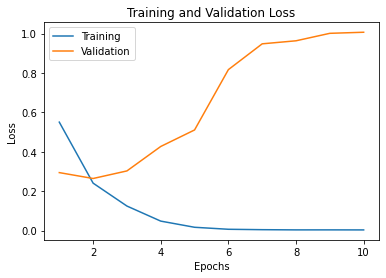


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_1Layers_8Size_Dropout\assets

Word Embedding Dimensions: 50
Layers: 1
Layer Size: 16
Dropout Rate: 0

Accuracy: 0.8576808
Total Time (s): 62.85232996940613

Model Loss Trend
----------------


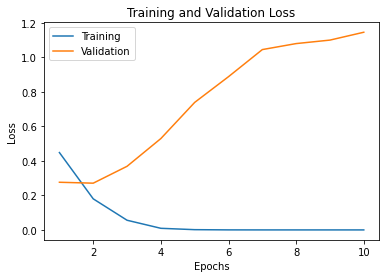


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_1Layers_16Size\assets

Word Embedding Dimensions: 50
Layers: 1
Layer Size: 16
Dropout Rate: 0.2

Accuracy: 0.85820025
Total Time (s): 63.235522985458374

Model Loss Trend
----------------


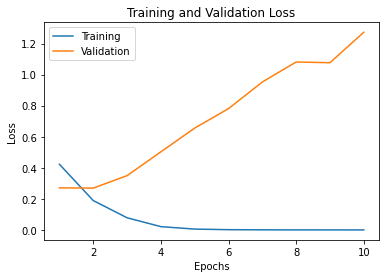


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_1Layers_16Size_Dropout\assets

Word Embedding Dimensions: 50
Layers: 1
Layer Size: 32
Dropout Rate: 0

Accuracy: 0.8597585
Total Time (s): 64.45199298858643

Model Loss Trend
----------------


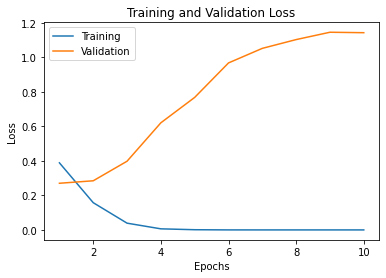


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_1Layers_32Size\assets

Word Embedding Dimensions: 50
Layers: 1
Layer Size: 32
Dropout Rate: 0.2

Accuracy: 0.8628749
Total Time (s): 64.88013482093811

Model Loss Trend
----------------


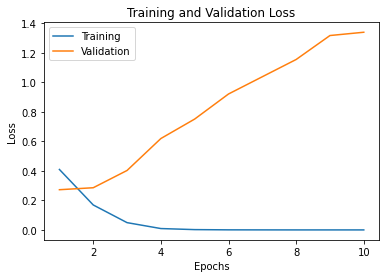


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_1Layers_32Size_Dropout\assets

Word Embedding Dimensions: 50
Layers: 2
Layer Size: 8
Dropout Rate: 0

Accuracy: 0.8598883
Total Time (s): 64.86972761154175

Model Loss Trend
----------------


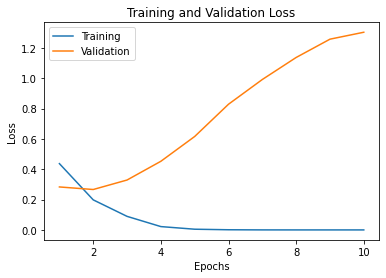


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_2Layers_8Size\assets

Word Embedding Dimensions: 50
Layers: 2
Layer Size: 8
Dropout Rate: 0.2

Accuracy: 0.8657317
Total Time (s): 65.42609763145447

Model Loss Trend
----------------


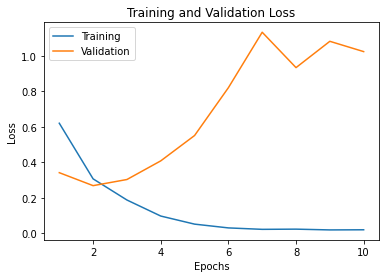


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_2Layers_8Size_Dropout\assets

Word Embedding Dimensions: 50
Layers: 2
Layer Size: 16
Dropout Rate: 0

Accuracy: 0.857551
Total Time (s): 66.02805471420288

Model Loss Trend
----------------


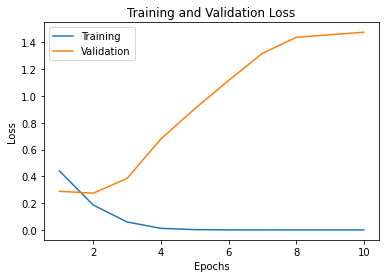


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_2Layers_16Size\assets

Word Embedding Dimensions: 50
Layers: 2
Layer Size: 16
Dropout Rate: 0.2

Accuracy: 0.8506687
Total Time (s): 65.73745512962341

Model Loss Trend
----------------


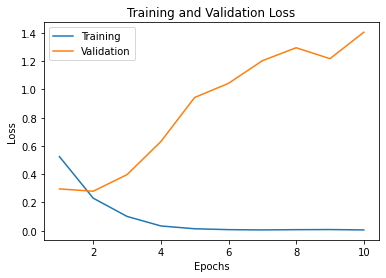


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_2Layers_16Size_Dropout\assets

Word Embedding Dimensions: 50
Layers: 2
Layer Size: 32
Dropout Rate: 0

Accuracy: 0.8506687
Total Time (s): 66.35857796669006

Model Loss Trend
----------------


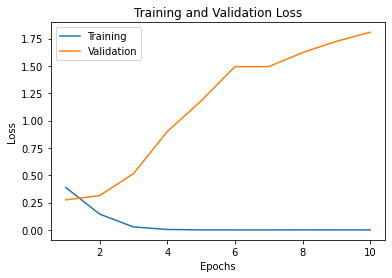


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_2Layers_32Size\assets

Word Embedding Dimensions: 50
Layers: 2
Layer Size: 32
Dropout Rate: 0.2

Accuracy: 0.85534346
Total Time (s): 66.4988203048706

Model Loss Trend
----------------


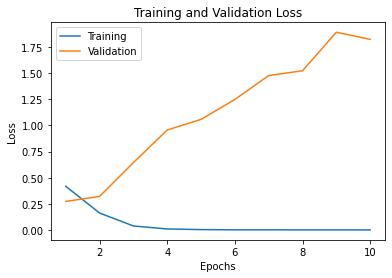


INFO:tensorflow:Assets written to: DNN_Embed_50Dims_2Layers_32Size_Dropout\assets

Word Embedding Dimensions: 100
Layers: 0
Layer Size: 0
Dropout Rate: 0

Accuracy: 0.871705
Total Time (s): 82.28038692474365

Model Loss Trend
----------------


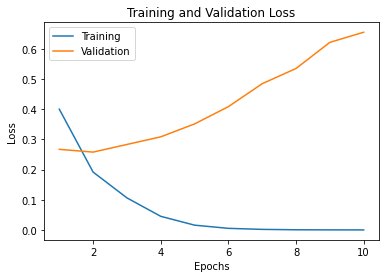


INFO:tensorflow:Assets written to: DNN_Embed_100Dims_0Layers_0Size\assets

Word Embedding Dimensions: 100
Layers: 1
Layer Size: 8
Dropout Rate: 0

Accuracy: 0.85897934
Total Time (s): 87.35537886619568

Model Loss Trend
----------------


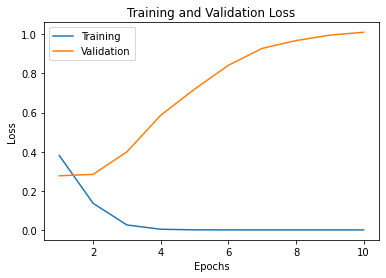


INFO:tensorflow:Assets written to: DNN_Embed_100Dims_1Layers_8Size\assets

Word Embedding Dimensions: 100
Layers: 1
Layer Size: 8
Dropout Rate: 0.2

Accuracy: 0.86728996
Total Time (s): 87.79380798339844

Model Loss Trend
----------------


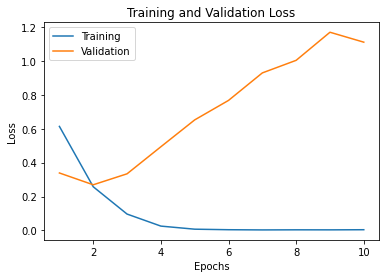


INFO:tensorflow:Assets written to: DNN_Embed_100Dims_1Layers_8Size_Dropout\assets

Word Embedding Dimensions: 100
Layers: 1
Layer Size: 16
Dropout Rate: 0

Accuracy: 0.8598883
Total Time (s): 88.16358876228333

Model Loss Trend
----------------


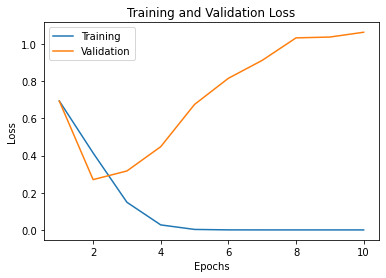


INFO:tensorflow:Assets written to: DNN_Embed_100Dims_1Layers_16Size\assets

Word Embedding Dimensions: 100
Layers: 1
Layer Size: 16
Dropout Rate: 0.2

Accuracy: 0.85949874
Total Time (s): 88.20398426055908

Model Loss Trend
----------------


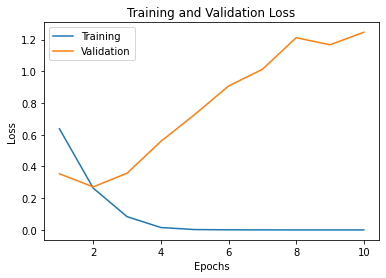

NotFoundError: Failed to create a NewWriteableFile: DNN_Embed_100Dims_1Layers_16Size_Dropout\variables\variables_temp_1733cbeae16144768faabe5a81d6048e/part-00001-of-00002.data-00000-of-00001.tempstate11197447986858190015 : The system cannot find the path specified.
; No such process [Op:SaveV2]

In [8]:
for dims in [10,25,50,100]:
    
    for layer in [0,1,2]:
        
        if layer == 0:
            
            sizes = [0]
            dropouts = [0]
            
        else:
            
            sizes = [8,16,32]
            dropouts = [0,0.2]
            
        for size in sizes:
        
            for dropout in dropouts:
    
                print('Word Embedding Dimensions:',dims)
                print('Layers:',layer)
                print('Layer Size:',size)
                print('Dropout Rate:',dropout)
                print()
                
                start_time = time.time()

                seed(5)
                tf.random.set_seed(5)

                model = models.Sequential()
                model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))
                model.add(Flatten())
                
                for layer_n in range(layer):
                    model.add(Dense(size, activation='relu'))

                    if dropout != 0:
                        model.add(Dropout(dropout))

                model.add(Dense(1, activation='sigmoid'))
                
                model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

                history = model.fit(X_train_seq, y_train, epochs=10, validation_split=0.2, verbose=False)

                total_time = time.time() - start_time

                loss, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

                print('Accuracy:',accuracy)
                print('Total Time (s):',total_time)
                print()

                acc = history.history['accuracy']
                val_acc = history.history['val_accuracy']
                loss = history.history['loss']
                val_loss = history.history['val_loss']

                print('Model Loss Trend')
                print('----------------')
                plot = plt.plot(range(1, len(acc) + 1), history.history['loss'], label = 'Training')
                plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_loss'], label = 'Validation')
                plot = plt.title('Training and Validation Loss')
                plot = plt.xlabel('Epochs')
                plot = plt.ylabel('Loss')
                plot = plt.legend()
                plt.show()
                print()
                
                if dropout == 0:
                    model_name = 'DNN_Embed_{}Dims_{}Layers_{}Size'.format(dims, layer, size)
                else:
                    model_name = 'DNN_Embed_{}Dims_{}Layers_{}Size_Dropout'.format(dims, layer, size)

                model.save(model_name)
                print()

                dnn_embed_results = dnn_embed_results.append(
                    {'Model':model_name,
                     'Embed_Dims':dims,
                     'Layers':layer,
                     'Size':size,
                     'Dropout':dropout,
                     'Time':total_time,
                     'Test Accuracy':accuracy}, ignore_index=True)

In [9]:
dnn_embed_results.to_csv('DNN_Embed_Results.csv')
dnn_embed_results

,Model,Embed_Dims,Layers,Size,Dropout,Time,Test Accuracy
0,DNN_Embed_10Dims_0Layers_0Size,10,0,0,0,35.629292,0.888326
1,DNN_Embed_10Dims_1Layers_8Size,10,1,8,0,36.198011,0.847552
2,DNN_Embed_10Dims_1Layers_8Size_Dropout,10,1,8,0.2,36.275574,0.866251
3,DNN_Embed_10Dims_1Layers_16Size,10,1,16,0,36.262340,0.847942
4,DNN_Embed_10Dims_1Layers_16Size_Dropout,10,1,16,0.2,37.507972,0.858460
5,DNN_Embed_10Dims_1Layers_32Size,10,1,32,0,36.434554,0.841969
6,DNN_Embed_10Dims_1Layers_32Size_Dropout,10,1,32,0.2,36.209808,0.845085
7,DNN_Embed_10Dims_2Layers_8Size,10,2,8,0,37.872409,0.849630
8,DNN_Embed_10Dims_2Layers_8Size_Dropout,10,2,8,0.2,37.367634,0.867160
9,DNN_Embed_10Dims_2Layers_16Size,10,2,16,0,37.479401,0.834827


## 1D ConvNet

In [16]:
X_train_conv = np.reshape(X_train_seq, (X_train_seq.shape[0],X_train_seq.shape[1],1))
X_test_conv = np.reshape(X_test_seq, (X_test_seq.shape[0],X_test_seq.shape[1],1))

In [26]:
model = models.Sequential()
model.add(Embedding(input_dim = voc_size, output_dim = 10, input_length = X_train_seq.shape[1])) 
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_52 (Embedding)     (None, 299, 10)           100000    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 297, 64)           1984      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 148, 64)           0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 9472)              0         
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 9473      
Total params: 111,457
Trainable params: 111,457
Non-trainable params: 0
_________________________________________________________________


In [30]:
cnn_results = pd.DataFrame(columns=['Model','Embed_Dims','Conv_Layers','Filters','Hidden_Layers','Size','Time','Test Accuracy'])

Embedding Dimensions: 10
Conv Layers: 1
Filters: 16
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88533956
Total Time (s): 42.013885498046875

Model Loss Trend
----------------


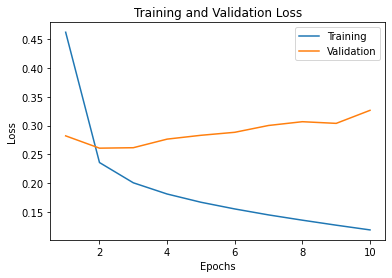


INFO:tensorflow:Assets written to: CNN_10D_1C_16F_0L_0N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 16
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.884041
Total Time (s): 51.077879667282104

Model Loss Trend
----------------


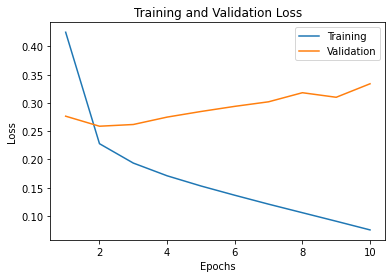


INFO:tensorflow:Assets written to: CNN_25D_1C_16F_0L_0N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 16
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.87871706
Total Time (s): 69.18510699272156

Model Loss Trend
----------------


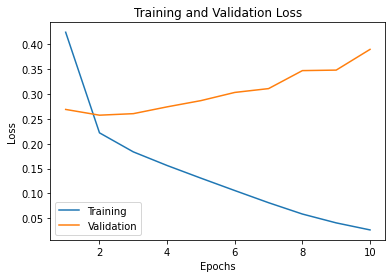


INFO:tensorflow:Assets written to: CNN_50D_1C_16F_0L_0N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.874302
Total Time (s): 45.969990491867065

Model Loss Trend
----------------


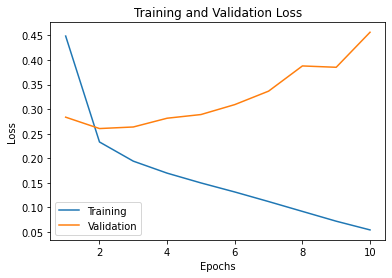


INFO:tensorflow:Assets written to: CNN_10D_1C_16F_1L_8N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.87897676
Total Time (s): 50.90009260177612

Model Loss Trend
----------------


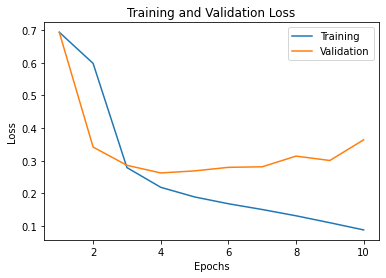


INFO:tensorflow:Assets written to: CNN_25D_1C_16F_1L_8N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8696273
Total Time (s): 77.49791049957275

Model Loss Trend
----------------


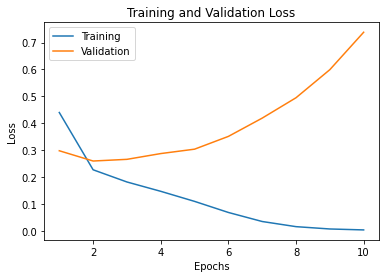


INFO:tensorflow:Assets written to: CNN_50D_1C_16F_1L_8N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88261265
Total Time (s): 49.384151458740234

Model Loss Trend
----------------


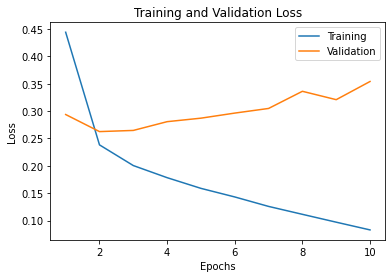


INFO:tensorflow:Assets written to: CNN_10D_1C_16F_1L_8N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8748214
Total Time (s): 56.49551582336426

Model Loss Trend
----------------


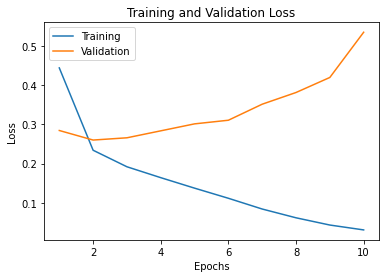


INFO:tensorflow:Assets written to: CNN_25D_1C_16F_1L_8N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8804051
Total Time (s): 74.88864469528198

Model Loss Trend
----------------


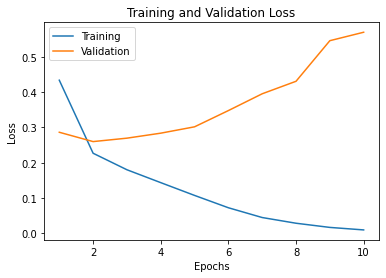


INFO:tensorflow:Assets written to: CNN_50D_1C_16F_1L_8N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.87637967
Total Time (s): 46.859941720962524

Model Loss Trend
----------------


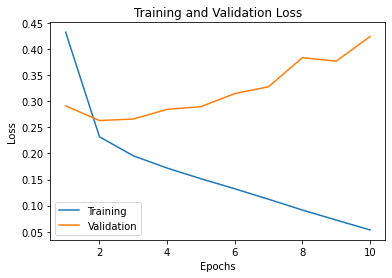


INFO:tensorflow:Assets written to: CNN_10D_1C_16F_1L_16N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8571614
Total Time (s): 52.50197958946228

Model Loss Trend
----------------


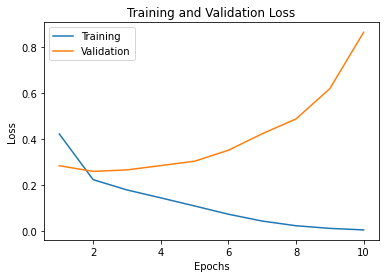


INFO:tensorflow:Assets written to: CNN_25D_1C_16F_1L_16N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8669004
Total Time (s): 70.25747394561768

Model Loss Trend
----------------


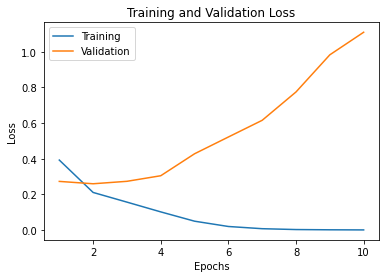


INFO:tensorflow:Assets written to: CNN_50D_1C_16F_1L_16N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8844306
Total Time (s): 46.95375466346741

Model Loss Trend
----------------


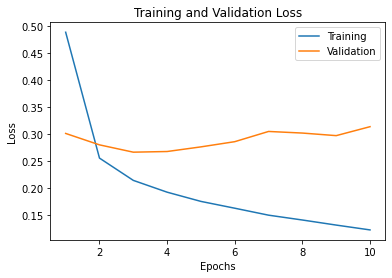


INFO:tensorflow:Assets written to: CNN_10D_1C_16F_1L_16N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8810544
Total Time (s): 53.44309949874878

Model Loss Trend
----------------


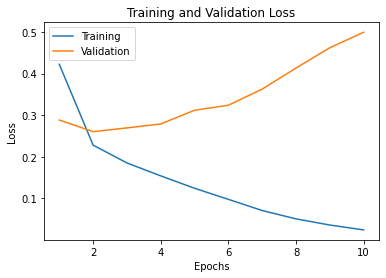


INFO:tensorflow:Assets written to: CNN_25D_1C_16F_1L_16N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8768991
Total Time (s): 74.2147626876831

Model Loss Trend
----------------


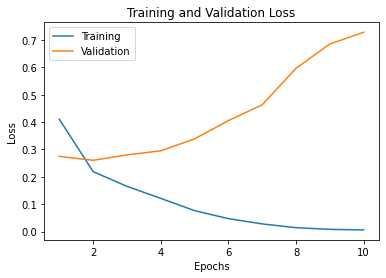


INFO:tensorflow:Assets written to: CNN_50D_1C_16F_1L_16N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87404233
Total Time (s): 44.994839906692505

Model Loss Trend
----------------


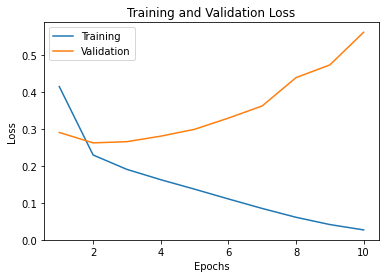


INFO:tensorflow:Assets written to: CNN_10D_1C_16F_1L_32N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.86508244
Total Time (s): 49.68828821182251

Model Loss Trend
----------------


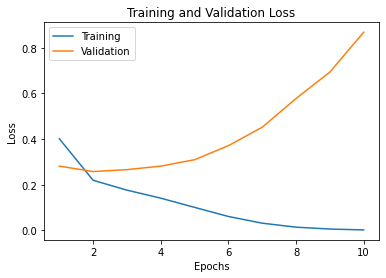


INFO:tensorflow:Assets written to: CNN_25D_1C_16F_1L_32N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8588495
Total Time (s): 71.9117157459259

Model Loss Trend
----------------


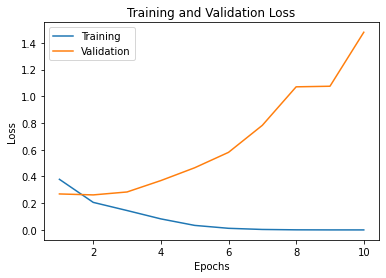


INFO:tensorflow:Assets written to: CNN_50D_1C_16F_1L_32N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87975585
Total Time (s): 46.99503684043884

Model Loss Trend
----------------


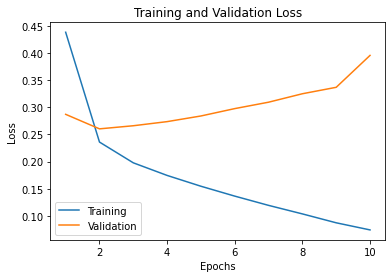


INFO:tensorflow:Assets written to: CNN_10D_1C_16F_1L_32N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8745617
Total Time (s): 53.98183798789978

Model Loss Trend
----------------


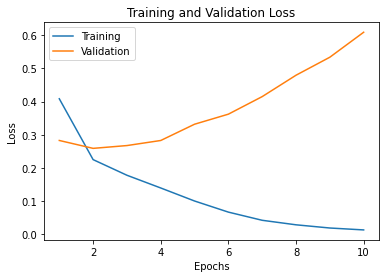


INFO:tensorflow:Assets written to: CNN_25D_1C_16F_1L_32N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87014675
Total Time (s): 70.72700476646423

Model Loss Trend
----------------


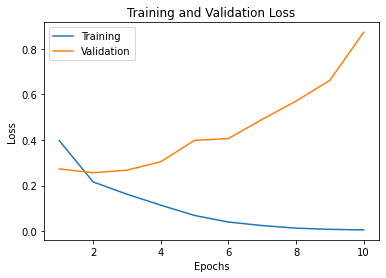


INFO:tensorflow:Assets written to: CNN_50D_1C_16F_1L_32N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 32
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88585895
Total Time (s): 43.52637076377869

Model Loss Trend
----------------


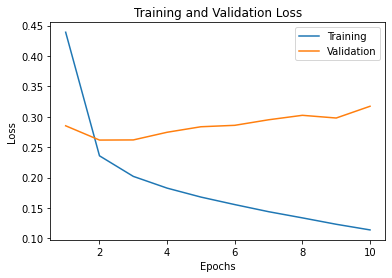


INFO:tensorflow:Assets written to: CNN_10D_1C_32F_0L_0N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 32
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8835216
Total Time (s): 51.0229229927063

Model Loss Trend
----------------


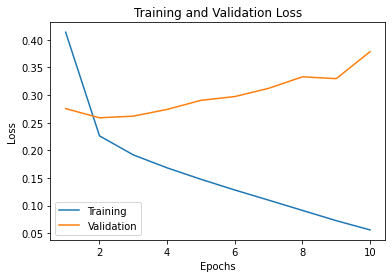


INFO:tensorflow:Assets written to: CNN_25D_1C_32F_0L_0N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 32
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8757304
Total Time (s): 72.001469373703

Model Loss Trend
----------------


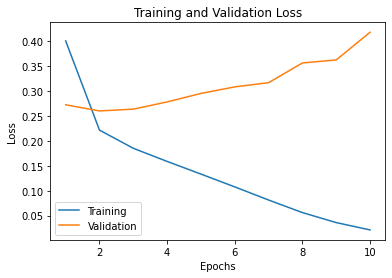


INFO:tensorflow:Assets written to: CNN_50D_1C_32F_0L_0N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8800156
Total Time (s): 48.17534804344177

Model Loss Trend
----------------


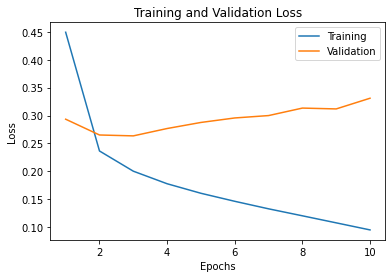


INFO:tensorflow:Assets written to: CNN_10D_1C_32F_1L_8N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8758603
Total Time (s): 55.02198052406311

Model Loss Trend
----------------


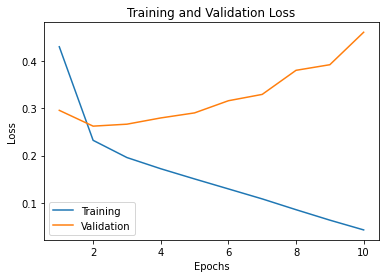


INFO:tensorflow:Assets written to: CNN_25D_1C_32F_1L_8N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.870796
Total Time (s): 74.61927556991577

Model Loss Trend
----------------


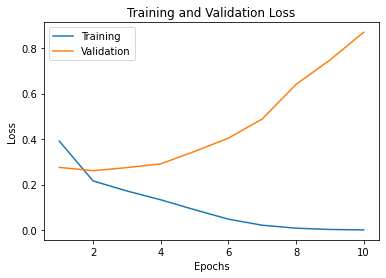


INFO:tensorflow:Assets written to: CNN_50D_1C_32F_1L_8N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8813141
Total Time (s): 48.7913978099823

Model Loss Trend
----------------


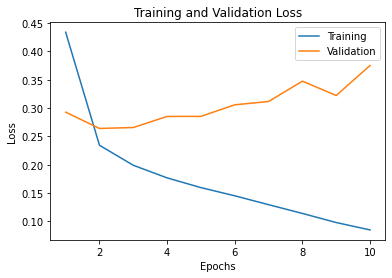


INFO:tensorflow:Assets written to: CNN_10D_1C_32F_1L_8N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8819634
Total Time (s): 55.872586250305176

Model Loss Trend
----------------


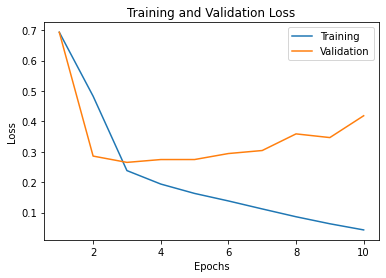


INFO:tensorflow:Assets written to: CNN_25D_1C_32F_1L_8N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.87988573
Total Time (s): 75.45468330383301

Model Loss Trend
----------------


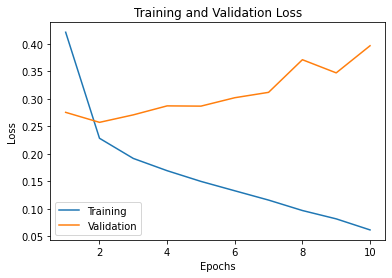


INFO:tensorflow:Assets written to: CNN_50D_1C_32F_1L_8N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8779379
Total Time (s): 48.31153964996338

Model Loss Trend
----------------


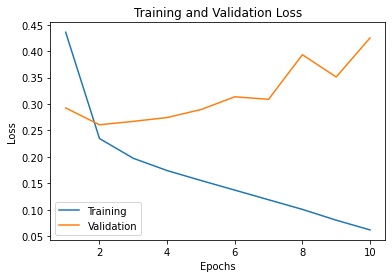


INFO:tensorflow:Assets written to: CNN_10D_1C_32F_1L_16N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.87612
Total Time (s): 55.24724078178406

Model Loss Trend
----------------


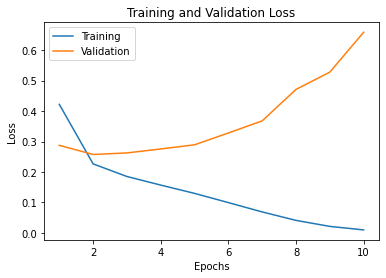


INFO:tensorflow:Assets written to: CNN_25D_1C_32F_1L_16N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8749513
Total Time (s): 75.9916422367096

Model Loss Trend
----------------


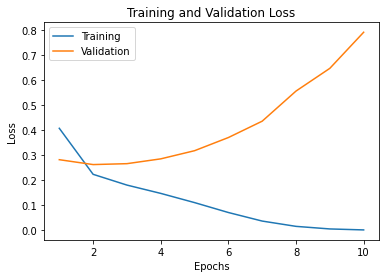


INFO:tensorflow:Assets written to: CNN_50D_1C_32F_1L_16N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.87975585
Total Time (s): 50.193506479263306

Model Loss Trend
----------------


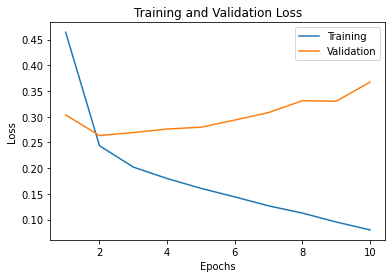


INFO:tensorflow:Assets written to: CNN_10D_1C_32F_1L_16N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8749513
Total Time (s): 55.912092208862305

Model Loss Trend
----------------


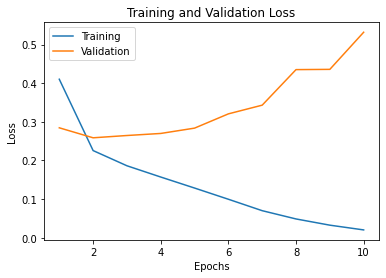


INFO:tensorflow:Assets written to: CNN_25D_1C_32F_1L_16N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8774185
Total Time (s): 76.92865490913391

Model Loss Trend
----------------


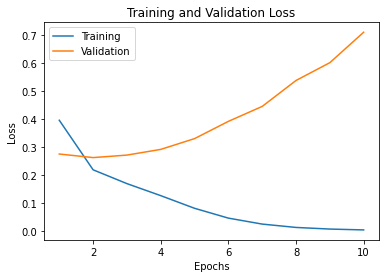


INFO:tensorflow:Assets written to: CNN_50D_1C_32F_1L_16N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.88222307
Total Time (s): 50.530834436416626

Model Loss Trend
----------------


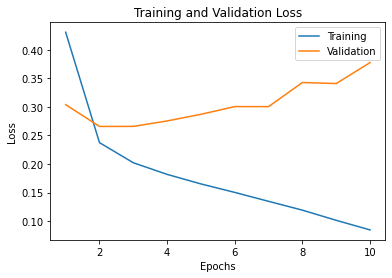


INFO:tensorflow:Assets written to: CNN_10D_1C_32F_1L_32N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8718348
Total Time (s): 56.097822427749634

Model Loss Trend
----------------


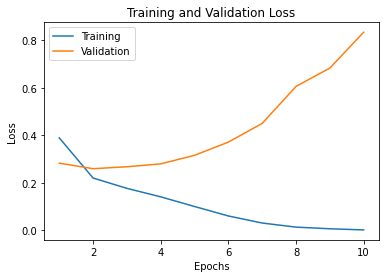


INFO:tensorflow:Assets written to: CNN_25D_1C_32F_1L_32N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8689781
Total Time (s): 76.46002721786499

Model Loss Trend
----------------


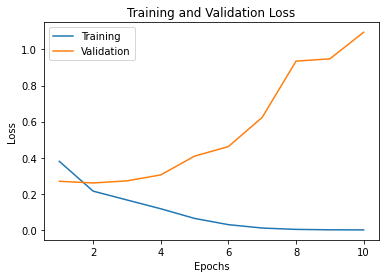


INFO:tensorflow:Assets written to: CNN_50D_1C_32F_1L_32N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8775484
Total Time (s): 51.12055230140686

Model Loss Trend
----------------


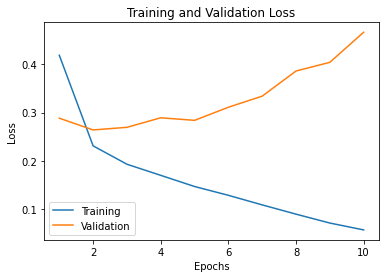


INFO:tensorflow:Assets written to: CNN_10D_1C_32F_1L_32N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87287366
Total Time (s): 58.910696506500244

Model Loss Trend
----------------


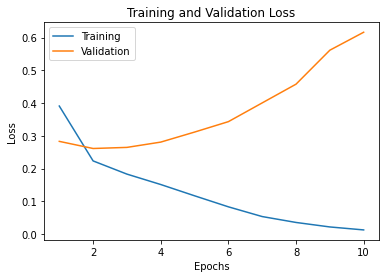


INFO:tensorflow:Assets written to: CNN_25D_1C_32F_1L_32N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8756006
Total Time (s): 77.97059392929077

Model Loss Trend
----------------


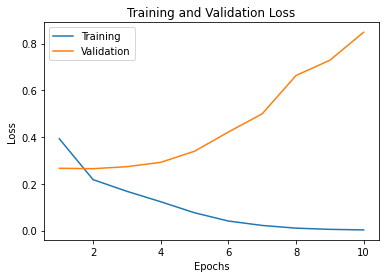


INFO:tensorflow:Assets written to: CNN_50D_1C_32F_1L_32N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 64
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8861187
Total Time (s): 52.08143949508667

Model Loss Trend
----------------


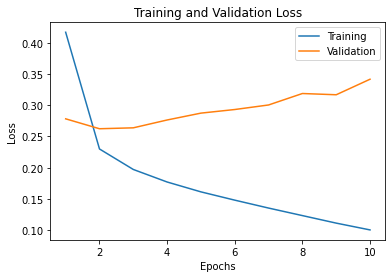


INFO:tensorflow:Assets written to: CNN_10D_1C_64F_0L_0N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 64
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8781976
Total Time (s): 59.842140913009644

Model Loss Trend
----------------


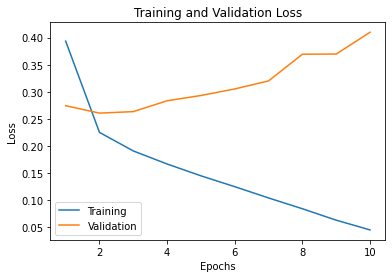


INFO:tensorflow:Assets written to: CNN_25D_1C_64F_0L_0N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 64
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8785872
Total Time (s): 80.66336846351624

Model Loss Trend
----------------


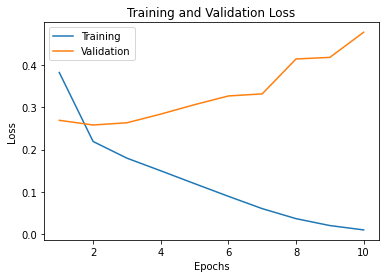


INFO:tensorflow:Assets written to: CNN_50D_1C_64F_0L_0N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88248277
Total Time (s): 55.558892011642456

Model Loss Trend
----------------


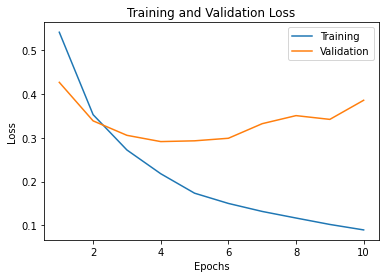


INFO:tensorflow:Assets written to: CNN_10D_1C_64F_1L_8N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.87975585
Total Time (s): 62.846932888031006

Model Loss Trend
----------------


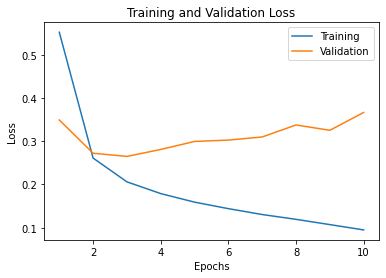


INFO:tensorflow:Assets written to: CNN_25D_1C_64F_1L_8N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.87949616
Total Time (s): 82.85108947753906

Model Loss Trend
----------------


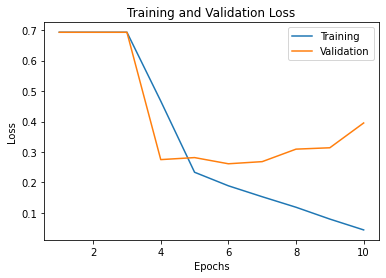


INFO:tensorflow:Assets written to: CNN_50D_1C_64F_1L_8N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.50084406
Total Time (s): 57.785059213638306

Model Loss Trend
----------------


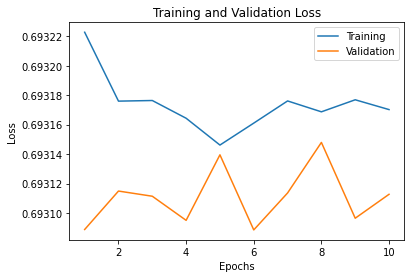


INFO:tensorflow:Assets written to: CNN_10D_1C_64F_1L_8N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8815738
Total Time (s): 63.71971344947815

Model Loss Trend
----------------


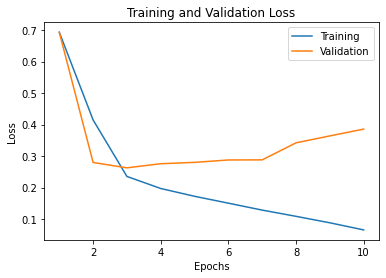


INFO:tensorflow:Assets written to: CNN_25D_1C_64F_1L_8N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.50084406
Total Time (s): 84.49070715904236

Model Loss Trend
----------------


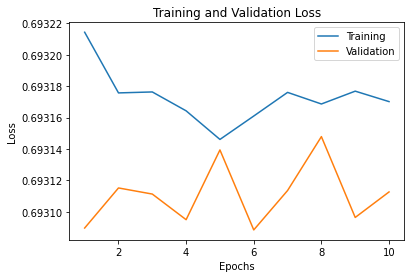


INFO:tensorflow:Assets written to: CNN_50D_1C_64F_1L_8N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8780678
Total Time (s): 56.35079050064087

Model Loss Trend
----------------


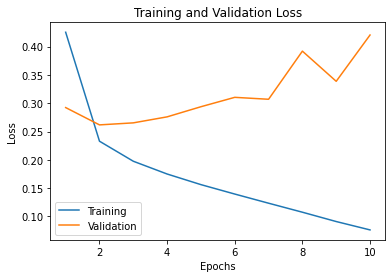


INFO:tensorflow:Assets written to: CNN_10D_1C_64F_1L_16N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8718348
Total Time (s): 63.62218427658081

Model Loss Trend
----------------


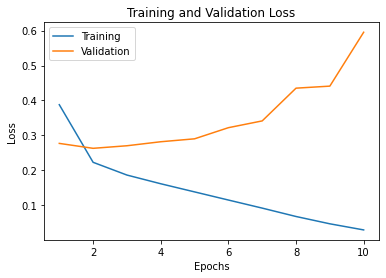


INFO:tensorflow:Assets written to: CNN_25D_1C_64F_1L_16N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.871705
Total Time (s): 84.4702479839325

Model Loss Trend
----------------


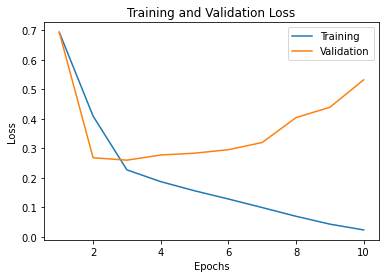


INFO:tensorflow:Assets written to: CNN_50D_1C_64F_1L_16N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.87845737
Total Time (s): 57.33716130256653

Model Loss Trend
----------------


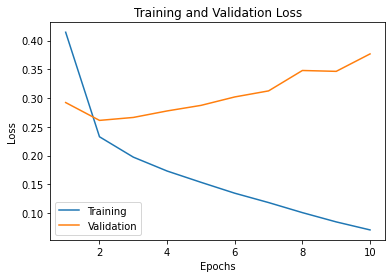


INFO:tensorflow:Assets written to: CNN_10D_1C_64F_1L_16N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8835216
Total Time (s): 63.51203155517578

Model Loss Trend
----------------


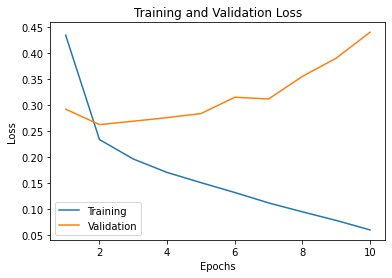


INFO:tensorflow:Assets written to: CNN_25D_1C_64F_1L_16N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.87599015
Total Time (s): 83.6527931690216

Model Loss Trend
----------------


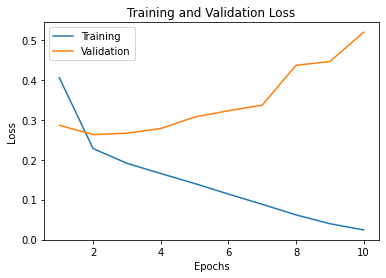


INFO:tensorflow:Assets written to: CNN_50D_1C_64F_1L_16N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8746916
Total Time (s): 57.408979415893555

Model Loss Trend
----------------


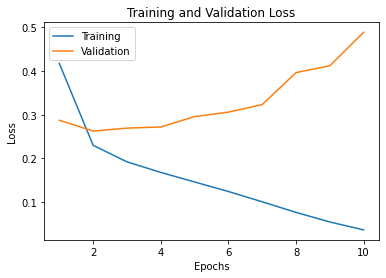


INFO:tensorflow:Assets written to: CNN_10D_1C_64F_1L_32N\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8754707
Total Time (s): 64.12547421455383

Model Loss Trend
----------------


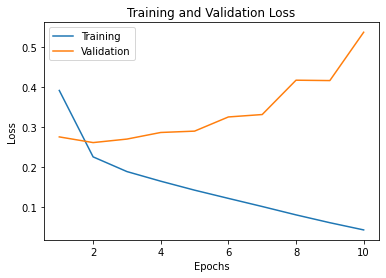


INFO:tensorflow:Assets written to: CNN_25D_1C_64F_1L_32N\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8781976
Total Time (s): 85.24138689041138

Model Loss Trend
----------------


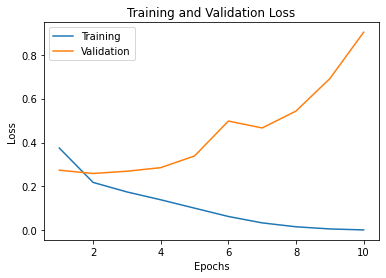


INFO:tensorflow:Assets written to: CNN_50D_1C_64F_1L_32N\assets

Embedding Dimensions: 10
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87897676
Total Time (s): 58.14243936538696

Model Loss Trend
----------------


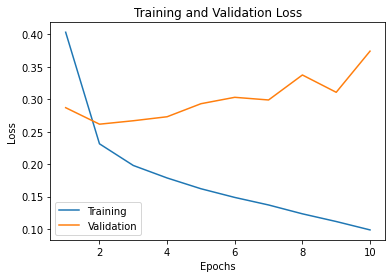


INFO:tensorflow:Assets written to: CNN_10D_1C_64F_1L_32N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8540449
Total Time (s): 65.37584853172302

Model Loss Trend
----------------


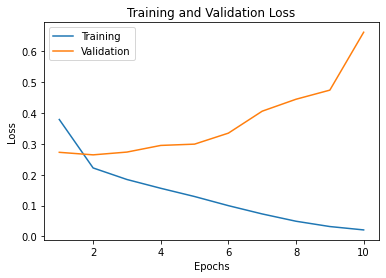


INFO:tensorflow:Assets written to: CNN_25D_1C_64F_1L_32N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 1
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8802753
Total Time (s): 87.22046399116516

Model Loss Trend
----------------


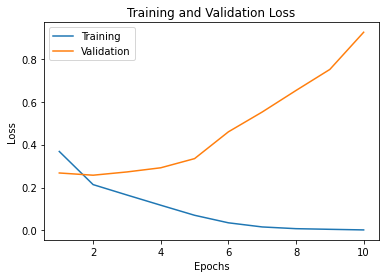


INFO:tensorflow:Assets written to: CNN_50D_1C_64F_1L_32N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 16
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88572913
Total Time (s): 50.78129839897156

Model Loss Trend
----------------


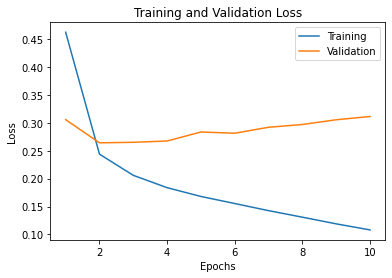


INFO:tensorflow:Assets written to: CNN_10D_2C_16F_0L_0N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 16
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88533956
Total Time (s): 57.19688892364502

Model Loss Trend
----------------


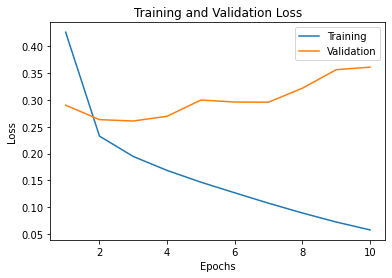


INFO:tensorflow:Assets written to: CNN_25D_2C_16F_0L_0N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 16
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88533956
Total Time (s): 78.42977404594421

Model Loss Trend
----------------


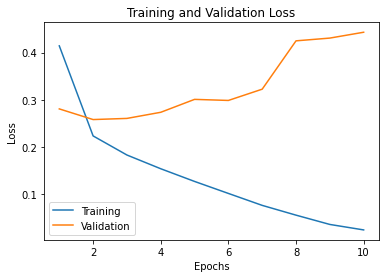


INFO:tensorflow:Assets written to: CNN_50D_2C_16F_0L_0N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88482016
Total Time (s): 52.85808324813843

Model Loss Trend
----------------


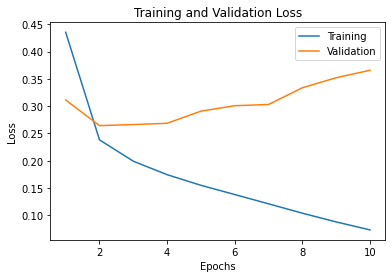


INFO:tensorflow:Assets written to: CNN_10D_2C_16F_1L_8N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8830022
Total Time (s): 58.074806213378906

Model Loss Trend
----------------


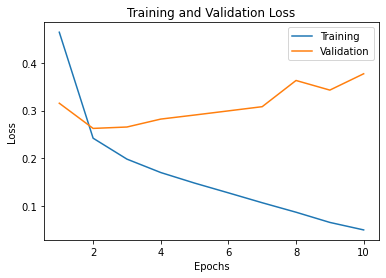


INFO:tensorflow:Assets written to: CNN_25D_2C_16F_1L_8N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8780678
Total Time (s): 78.01275539398193

Model Loss Trend
----------------


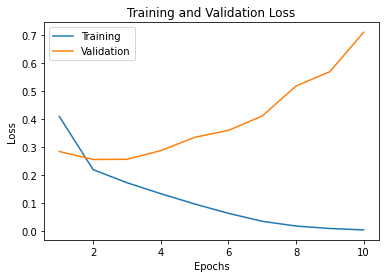


INFO:tensorflow:Assets written to: CNN_50D_2C_16F_1L_8N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88845605
Total Time (s): 52.745418548583984

Model Loss Trend
----------------


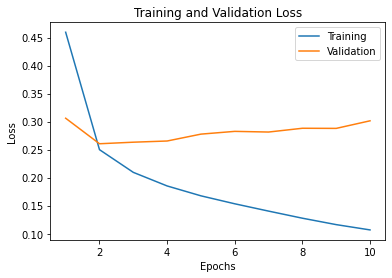


INFO:tensorflow:Assets written to: CNN_10D_2C_16F_1L_8N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8758603
Total Time (s): 59.840893268585205

Model Loss Trend
----------------


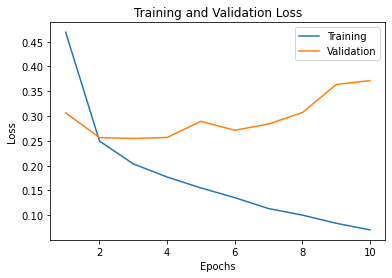


INFO:tensorflow:Assets written to: CNN_25D_2C_16F_1L_8N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8776782
Total Time (s): 78.58268523216248

Model Loss Trend
----------------


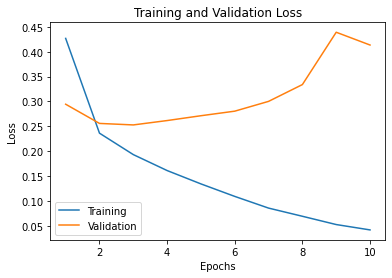


INFO:tensorflow:Assets written to: CNN_50D_2C_16F_1L_8N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.871705
Total Time (s): 52.01031231880188

Model Loss Trend
----------------


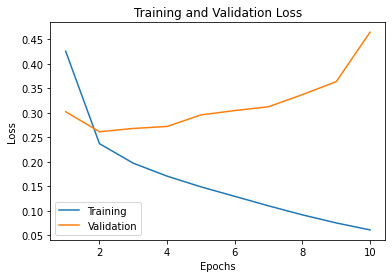


INFO:tensorflow:Assets written to: CNN_10D_2C_16F_1L_16N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8745617
Total Time (s): 59.080018043518066

Model Loss Trend
----------------


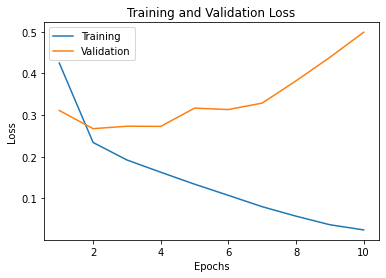


INFO:tensorflow:Assets written to: CNN_25D_2C_16F_1L_16N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8749513
Total Time (s): 78.3454008102417

Model Loss Trend
----------------


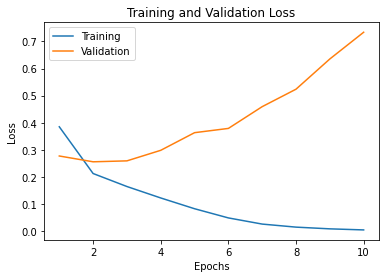


INFO:tensorflow:Assets written to: CNN_50D_2C_16F_1L_16N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.88923514
Total Time (s): 49.936737060546875

Model Loss Trend
----------------


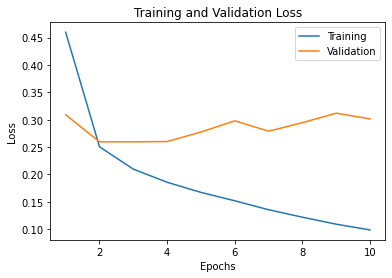


INFO:tensorflow:Assets written to: CNN_10D_2C_16F_1L_16N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.88482016
Total Time (s): 56.91464710235596

Model Loss Trend
----------------


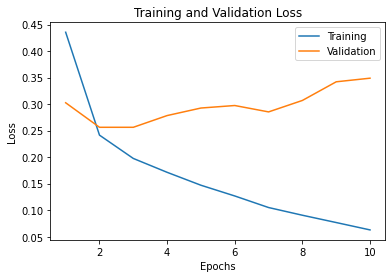


INFO:tensorflow:Assets written to: CNN_25D_2C_16F_1L_16N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8846903
Total Time (s): 75.89432573318481

Model Loss Trend
----------------


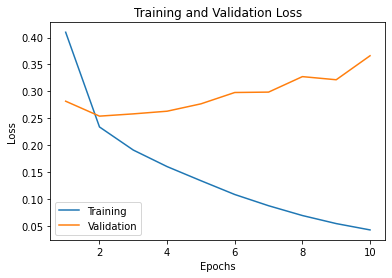


INFO:tensorflow:Assets written to: CNN_50D_2C_16F_1L_16N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8815738
Total Time (s): 50.08024740219116

Model Loss Trend
----------------


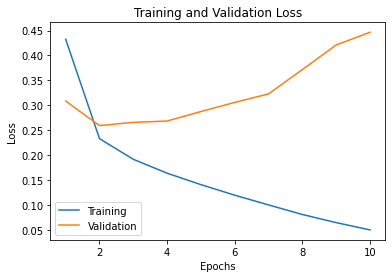


INFO:tensorflow:Assets written to: CNN_10D_2C_16F_1L_32N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8832619
Total Time (s): 56.67076659202576

Model Loss Trend
----------------


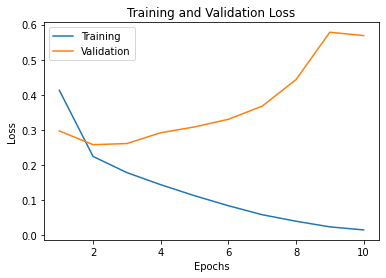


INFO:tensorflow:Assets written to: CNN_25D_2C_16F_1L_32N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87949616
Total Time (s): 75.63283729553223

Model Loss Trend
----------------


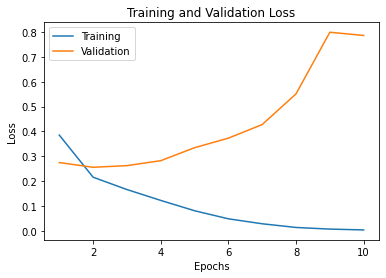


INFO:tensorflow:Assets written to: CNN_50D_2C_16F_1L_32N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8867679
Total Time (s): 49.97745895385742

Model Loss Trend
----------------


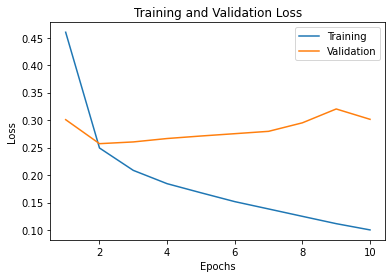


INFO:tensorflow:Assets written to: CNN_10D_2C_16F_1L_32N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8841709
Total Time (s): 56.99240207672119

Model Loss Trend
----------------


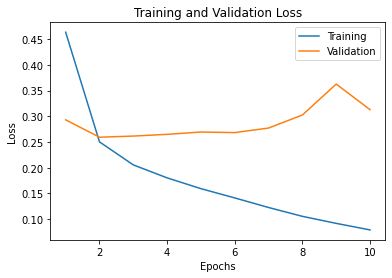


INFO:tensorflow:Assets written to: CNN_25D_2C_16F_1L_32N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 16
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8830022
Total Time (s): 76.22906613349915

Model Loss Trend
----------------


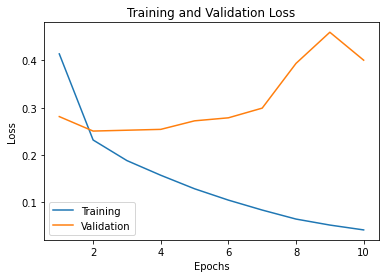


INFO:tensorflow:Assets written to: CNN_50D_2C_16F_1L_32N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 32
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88507986
Total Time (s): 50.68169665336609

Model Loss Trend
----------------


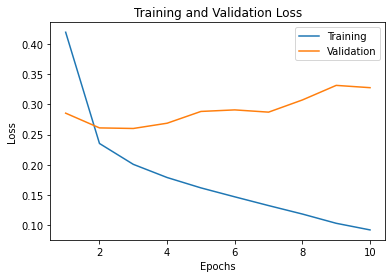


INFO:tensorflow:Assets written to: CNN_10D_2C_32F_0L_0N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 32
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8827425
Total Time (s): 57.04764533042908

Model Loss Trend
----------------


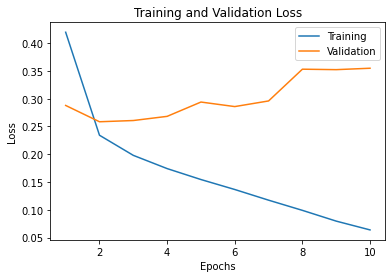


INFO:tensorflow:Assets written to: CNN_25D_2C_32F_0L_0N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 32
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8819634
Total Time (s): 75.91812825202942

Model Loss Trend
----------------


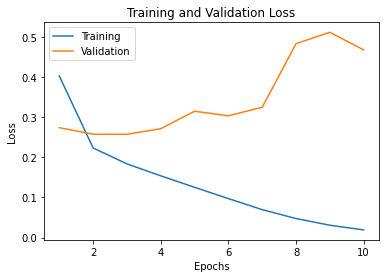


INFO:tensorflow:Assets written to: CNN_50D_2C_32F_0L_0N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88339174
Total Time (s): 53.54541826248169

Model Loss Trend
----------------


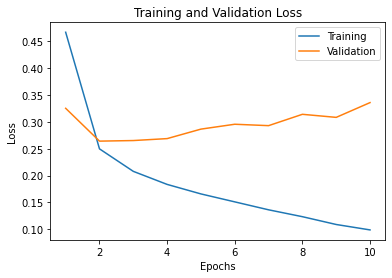


INFO:tensorflow:Assets written to: CNN_10D_2C_32F_1L_8N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88183355
Total Time (s): 59.76564049720764

Model Loss Trend
----------------


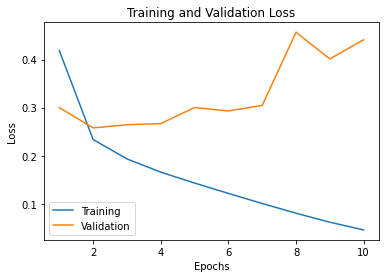


INFO:tensorflow:Assets written to: CNN_25D_2C_32F_1L_8N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88183355
Total Time (s): 78.51069712638855

Model Loss Trend
----------------


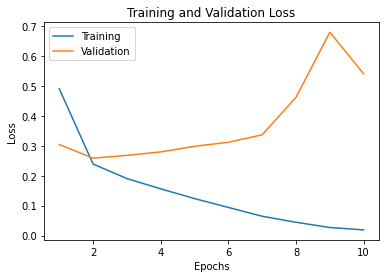


INFO:tensorflow:Assets written to: CNN_50D_2C_32F_1L_8N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8900143
Total Time (s): 53.88320207595825

Model Loss Trend
----------------


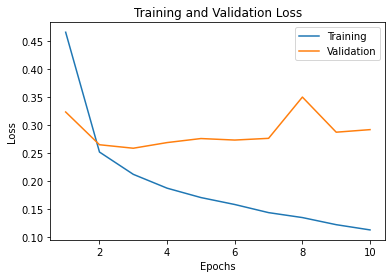


INFO:tensorflow:Assets written to: CNN_10D_2C_32F_1L_8N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8863784
Total Time (s): 60.67335534095764

Model Loss Trend
----------------


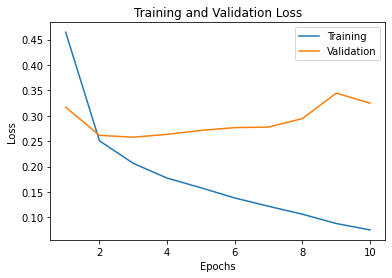


INFO:tensorflow:Assets written to: CNN_25D_2C_32F_1L_8N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8741722
Total Time (s): 79.286208152771

Model Loss Trend
----------------


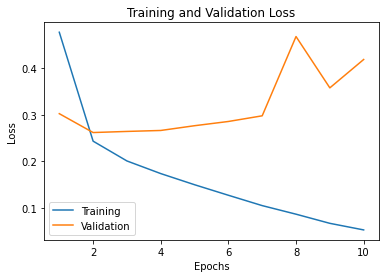


INFO:tensorflow:Assets written to: CNN_50D_2C_32F_1L_8N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.884041
Total Time (s): 54.01121520996094

Model Loss Trend
----------------


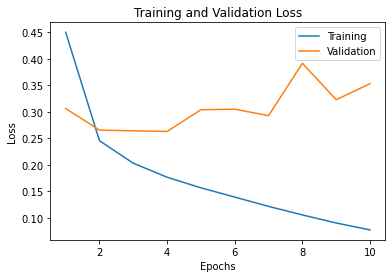


INFO:tensorflow:Assets written to: CNN_10D_2C_32F_1L_16N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8861187
Total Time (s): 60.252251625061035

Model Loss Trend
----------------


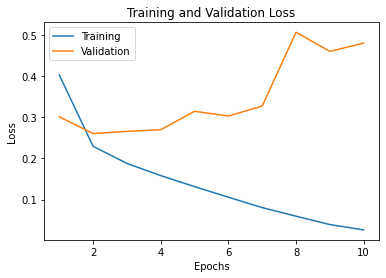


INFO:tensorflow:Assets written to: CNN_25D_2C_32F_1L_16N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.88183355
Total Time (s): 80.05752444267273

Model Loss Trend
----------------


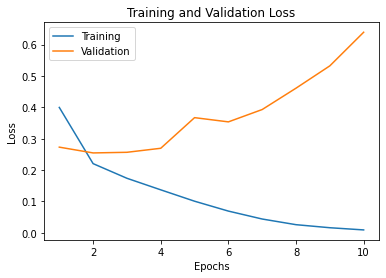


INFO:tensorflow:Assets written to: CNN_50D_2C_32F_1L_16N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8866381
Total Time (s): 54.10189509391785

Model Loss Trend
----------------


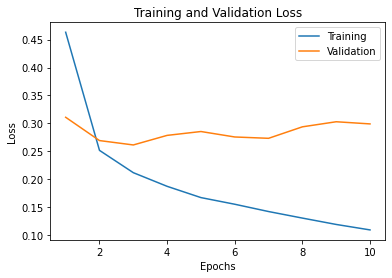


INFO:tensorflow:Assets written to: CNN_10D_2C_32F_1L_16N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.88871574
Total Time (s): 63.96695280075073

Model Loss Trend
----------------


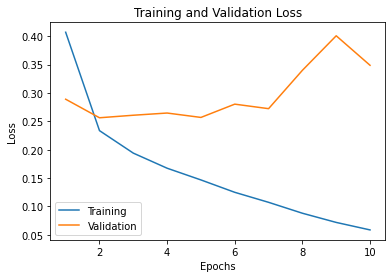


INFO:tensorflow:Assets written to: CNN_25D_2C_32F_1L_16N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8835216
Total Time (s): 84.59221911430359

Model Loss Trend
----------------


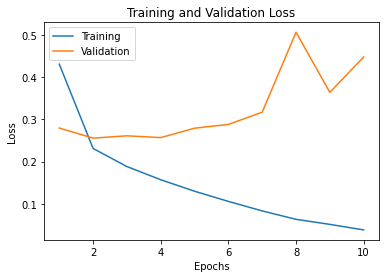


INFO:tensorflow:Assets written to: CNN_50D_2C_32F_1L_16N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.88572913
Total Time (s): 55.57997226715088

Model Loss Trend
----------------


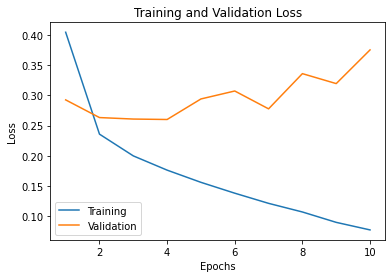


INFO:tensorflow:Assets written to: CNN_10D_2C_32F_1L_32N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87962604
Total Time (s): 62.11941432952881

Model Loss Trend
----------------


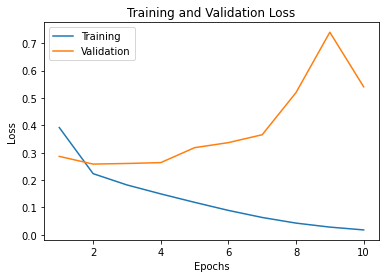


INFO:tensorflow:Assets written to: CNN_25D_2C_32F_1L_32N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8844306
Total Time (s): 81.22459387779236

Model Loss Trend
----------------


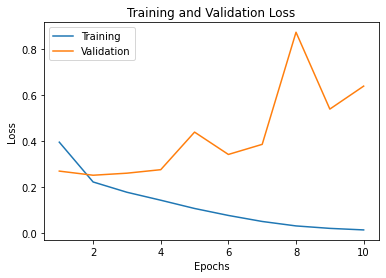


INFO:tensorflow:Assets written to: CNN_50D_2C_32F_1L_32N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8919621
Total Time (s): 56.782026529312134

Model Loss Trend
----------------


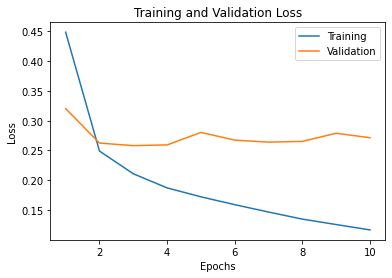


INFO:tensorflow:Assets written to: CNN_10D_2C_32F_1L_32N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8880665
Total Time (s): 63.113518714904785

Model Loss Trend
----------------


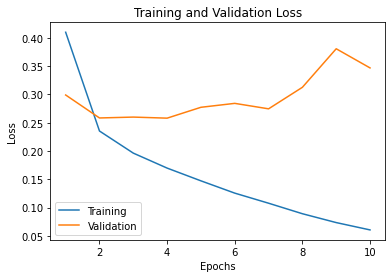


INFO:tensorflow:Assets written to: CNN_25D_2C_32F_1L_32N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 32
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.86482275
Total Time (s): 82.52374601364136

Model Loss Trend
----------------


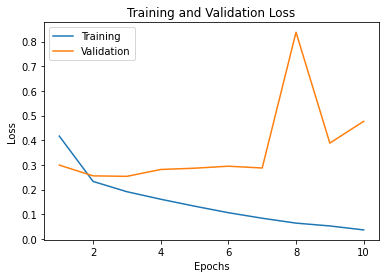


INFO:tensorflow:Assets written to: CNN_50D_2C_32F_1L_32N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 64
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88585895
Total Time (s): 59.77708458900452

Model Loss Trend
----------------


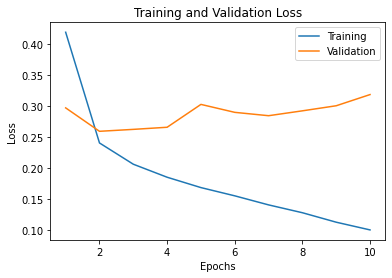


INFO:tensorflow:Assets written to: CNN_10D_2C_64F_0L_0N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 64
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.88339174
Total Time (s): 65.63465285301208

Model Loss Trend
----------------


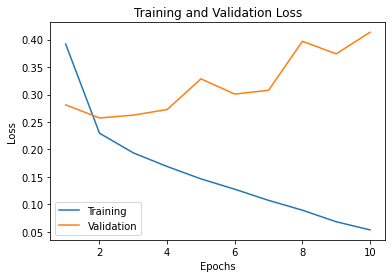


INFO:tensorflow:Assets written to: CNN_25D_2C_64F_0L_0N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 64
Hidden Layers: 0
Hidden Layer Size: 0
--------------------------
Accuracy: 0.8800156
Total Time (s): 87.67071843147278

Model Loss Trend
----------------


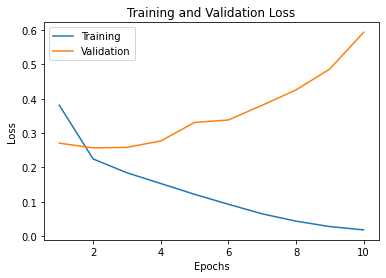


INFO:tensorflow:Assets written to: CNN_50D_2C_64F_0L_0N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88495
Total Time (s): 62.56174635887146

Model Loss Trend
----------------


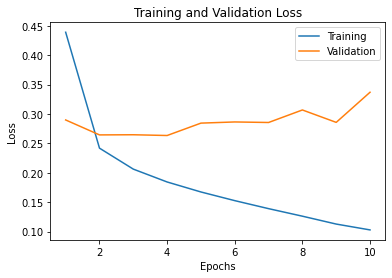


INFO:tensorflow:Assets written to: CNN_10D_2C_64F_1L_8N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8830022
Total Time (s): 68.4357397556305

Model Loss Trend
----------------


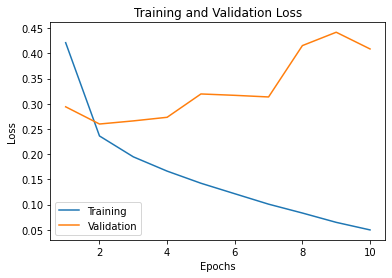


INFO:tensorflow:Assets written to: CNN_25D_2C_64F_1L_8N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.88261265
Total Time (s): 90.95546221733093

Model Loss Trend
----------------


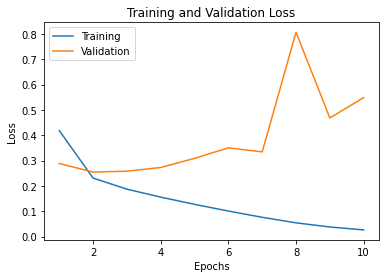


INFO:tensorflow:Assets written to: CNN_50D_2C_64F_1L_8N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8891053
Total Time (s): 63.554473876953125

Model Loss Trend
----------------


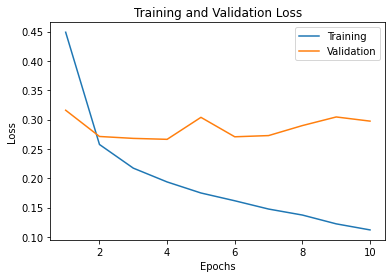


INFO:tensorflow:Assets written to: CNN_10D_2C_64F_1L_8N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8891053
Total Time (s): 70.14279222488403

Model Loss Trend
----------------


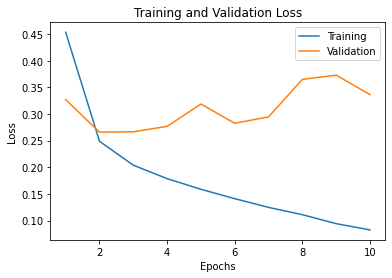


INFO:tensorflow:Assets written to: CNN_25D_2C_64F_1L_8N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 8
--------------------------
Accuracy: 0.8727438
Total Time (s): 92.2581307888031

Model Loss Trend
----------------


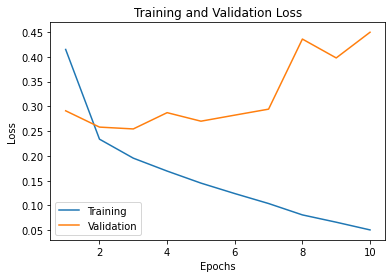


INFO:tensorflow:Assets written to: CNN_50D_2C_64F_1L_8N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8875471
Total Time (s): 63.65612864494324

Model Loss Trend
----------------


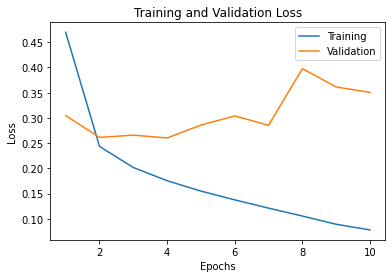


INFO:tensorflow:Assets written to: CNN_10D_2C_64F_1L_16N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8830022
Total Time (s): 69.14772009849548

Model Loss Trend
----------------


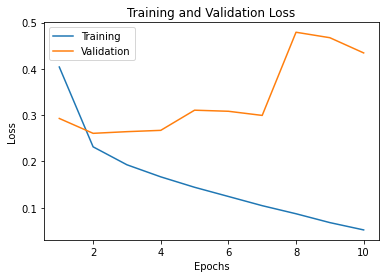


INFO:tensorflow:Assets written to: CNN_25D_2C_64F_1L_16N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.88248277
Total Time (s): 91.46287822723389

Model Loss Trend
----------------


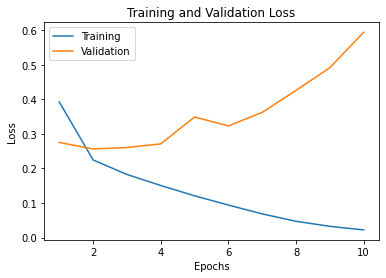


INFO:tensorflow:Assets written to: CNN_50D_2C_64F_1L_16N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8922218
Total Time (s): 63.53095483779907

Model Loss Trend
----------------


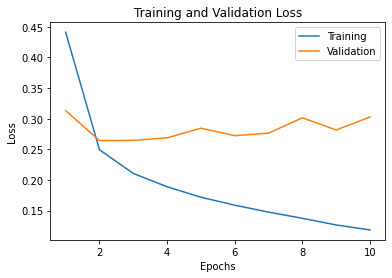


INFO:tensorflow:Assets written to: CNN_10D_2C_64F_1L_16N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.8862485
Total Time (s): 70.47823119163513

Model Loss Trend
----------------


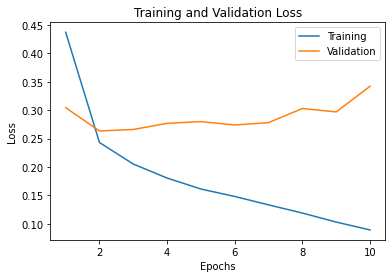


INFO:tensorflow:Assets written to: CNN_25D_2C_64F_1L_16N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 16
--------------------------
Accuracy: 0.89118296
Total Time (s): 91.10674595832825

Model Loss Trend
----------------


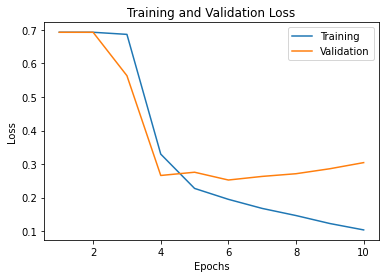


INFO:tensorflow:Assets written to: CNN_50D_2C_64F_1L_16N_Dropout\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.88871574
Total Time (s): 62.96197032928467

Model Loss Trend
----------------


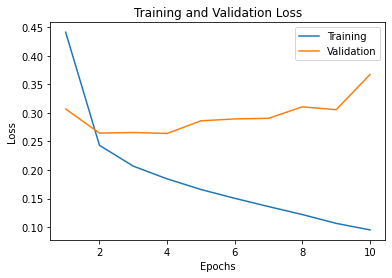


INFO:tensorflow:Assets written to: CNN_10D_2C_64F_1L_32N\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8776782
Total Time (s): 70.62905621528625

Model Loss Trend
----------------


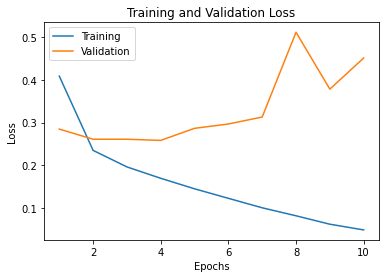


INFO:tensorflow:Assets written to: CNN_25D_2C_64F_1L_32N\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.87962604
Total Time (s): 92.79859137535095

Model Loss Trend
----------------


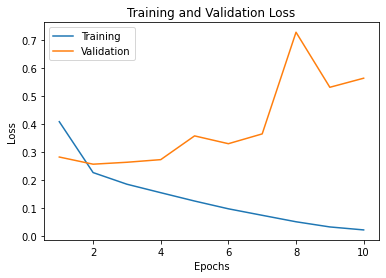


INFO:tensorflow:Assets written to: CNN_50D_2C_64F_1L_32N\assets

Embedding Dimensions: 10
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8896247
Total Time (s): 63.973260164260864

Model Loss Trend
----------------


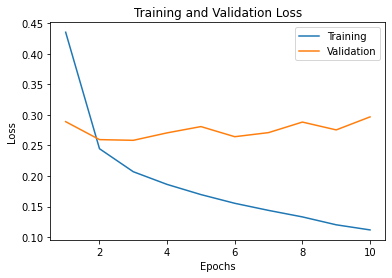


INFO:tensorflow:Assets written to: CNN_10D_2C_64F_1L_32N_Dropout\assets

Embedding Dimensions: 25
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.88248277
Total Time (s): 70.93128657341003

Model Loss Trend
----------------


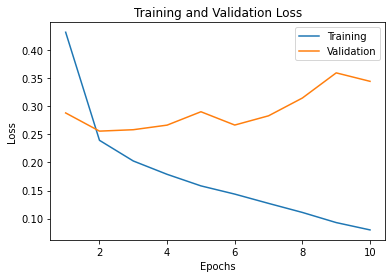


INFO:tensorflow:Assets written to: CNN_25D_2C_64F_1L_32N_Dropout\assets

Embedding Dimensions: 50
Conv Layers: 2
Filters: 64
Hidden Layers: 1
Hidden Layer Size: 32
--------------------------
Accuracy: 0.8781976
Total Time (s): 91.30460166931152

Model Loss Trend
----------------


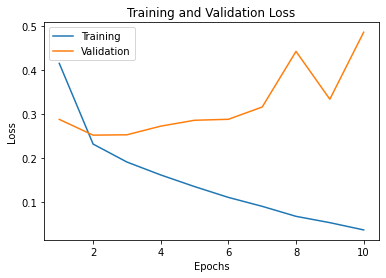


INFO:tensorflow:Assets written to: CNN_50D_2C_64F_1L_32N_Dropout\assets



In [32]:
for conv_layers in [1,2]:

    for f in [16,32,64]:
        
        for layers in [0,1]:
            
            if layers == 0:
                sizes = [0]
                dropouts=[0]
            
            else:
                sizes=[8,16,32]
                dropouts=[0,0.2]
                
            for size in sizes:

                for dropout in dropouts:

                    for dims in [10,25,50]:

                        start_time = time.time()
                        print('Embedding Dimensions:',dims)
                        print('Conv Layers:',conv_layers)
                        print('Filters:',f)
                        print('Hidden Layers:',layers)
                        print('Hidden Layer Size:',size)
                        print('--------------------------')

                        seed(5)
                        tf.random.set_seed(5)

                        model = models.Sequential()
                        model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))
                        
                        for conv_n in range(conv_layers):
                            model.add(Conv1D(filters=f, kernel_size=3, activation='relu'))
                            model.add(MaxPooling1D(pool_size=2))
                            
                            if dropout != 0:
                                model.add(Dropout(dropout))
                        
                        model.add(Flatten())  
                        
                        for hidden_n in range(layers):
                         
                            model.add(Dense(size, activation='relu'))
                        
                        model.add(Dense(1, activation='sigmoid'))

                        model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

                        history = model.fit(X_train_seq, y_train, epochs=10, validation_split=0.2, verbose=False)

                        total_time = time.time() - start_time

                        loss, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

                        print('Accuracy:',accuracy)
                        print('Total Time (s):',total_time)
                        print()

                        acc = history.history['accuracy']
                        val_acc = history.history['val_accuracy']
                        loss = history.history['loss']
                        val_loss = history.history['val_loss']

                        print('Model Loss Trend')
                        print('----------------')
                        plot = plt.plot(range(1, len(acc) + 1), history.history['loss'], label = 'Training')
                        plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_loss'], label = 'Validation')
                        plot = plt.title('Training and Validation Loss')
                        plot = plt.xlabel('Epochs')
                        plot = plt.ylabel('Loss')
                        plot = plt.legend()
                        plt.show()
                        print()

                        if dropout == 0:
                            model_name = 'CNN_{}D_{}C_{}F_{}L_{}N'.format(dims,conv_layers,f,layers,size)
                            
                        else:
                            model_name = 'CNN_{}D_{}C_{}F_{}L_{}N_Dropout'.format(dims,conv_layers,f,layers,size)

                        model.save(model_name)
                        print()

                        cnn_results = cnn_results.append(
                            {'Model':model_name,
                             'Embed_Dims':dims,
                             'Conv_Layers':conv_layers,
                             'Filters':f,
                             'Hidden_Layers':layers,
                             'Size':size,
                             'Time':total_time,
                             'Test Accuracy':accuracy}, ignore_index=True)

In [33]:
cnn_results.to_csv('CNN_Results.csv')

,Model,Embed_Dims,Conv_Layers,Filters,Hidden_Layers,Size,Time,Test Accuracy
0,CNN_10D_1C_16F_0L_0N,10,1,16,0,0,42.013885,0.885340
1,CNN_25D_1C_16F_0L_0N,25,1,16,0,0,51.077880,0.884041
2,CNN_50D_1C_16F_0L_0N,50,1,16,0,0,69.185107,0.878717
3,CNN_10D_1C_16F_1L_8N,10,1,16,1,8,45.969990,0.874302
4,CNN_25D_1C_16F_1L_8N,25,1,16,1,8,50.900093,0.878977
...,...,...,...,...,...,...,...,...
121,CNN_25D_2C_64F_1L_32N,25,2,64,1,32,70.629056,0.877678
122,CNN_50D_2C_64F_1L_32N,50,2,64,1,32,92.798591,0.879626
123,CNN_10D_2C_64F_1L_32N_Dropout,10,2,64,1,32,63.973260,0.889625
124,CNN_25D_2C_64F_1L_32N_Dropout,25,2,64,1,32,70.931287,0.882483


In [34]:
cnn_results.sort_values(by='Test Accuracy',ascending=False)

,Model,Embed_Dims,Conv_Layers,Filters,Hidden_Layers,Size,Time,Test Accuracy
117,CNN_10D_2C_64F_1L_16N_Dropout,10,2,64,1,16,63.530955,0.892222
102,CNN_10D_2C_32F_1L_32N_Dropout,10,2,32,1,32,56.782027,0.891962
119,CNN_50D_2C_64F_1L_16N_Dropout,50,2,64,1,16,91.106746,0.891183
90,CNN_10D_2C_32F_1L_8N_Dropout,10,2,32,1,8,53.883202,0.890014
123,CNN_10D_2C_64F_1L_32N_Dropout,10,2,64,1,32,63.973260,0.889625
...,...,...,...,...,...,...,...,...
17,CNN_50D_1C_16F_1L_32N,50,1,16,1,32,71.911716,0.858850
10,CNN_25D_1C_16F_1L_16N,25,1,16,1,16,52.501980,0.857161
61,CNN_25D_1C_64F_1L_32N_Dropout,25,1,64,1,32,65.375849,0.854045
48,CNN_10D_1C_64F_1L_8N_Dropout,10,1,64,1,8,57.785059,0.500844


## 1D ConvNet Experiments

In [76]:
def fitCNN(model,epochs):
    
    start_time = time.time()

    history = model.fit(X_train_seq, y_train, epochs=epochs, validation_split=0.2, verbose=True)

    total_time = time.time() - start_time

    loss, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

    print('Accuracy:',accuracy)
    print('Total Time (s):',total_time)
    print()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    print('Model Loss Trend')
    print('----------------')
    plot = plt.plot(range(1, len(acc) + 1), history.history['loss'], label = 'Training')
    plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_loss'], label = 'Validation')
    plot = plt.title('Training and Validation Loss')
    plot = plt.xlabel('Epochs')
    plot = plt.ylabel('Loss')
    plot = plt.legend()
    plt.show()
    print()

### 1D ConvNet Model 1 (Descending Filter Count)

Accuracy: 0.8878068
Total Time (s): 87.94006109237671

Model Loss Trend
----------------


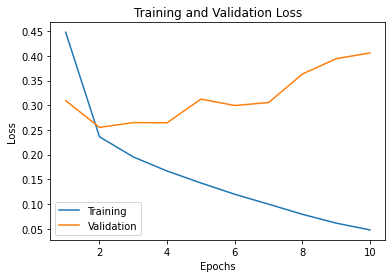

In [51]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 50, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model)

### 1D ConvNet Model 2 (Double Kernel Size)

Accuracy: 0.875211
Total Time (s): 95.76430892944336

Model Loss Trend
----------------


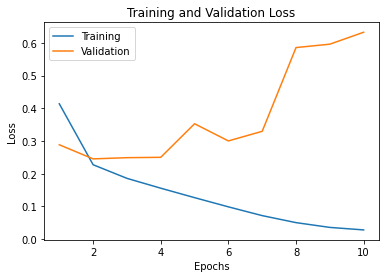

In [52]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 50, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model)

### 1D ConvNet Model 3 (Additional Dropout Layer)

Accuracy: 0.8657317
Total Time (s): 92.26225066184998

Model Loss Trend
----------------


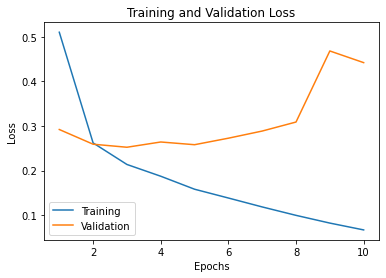

In [53]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 50, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model)

Accuracy: 0.89378005
Total Time (s): 27.674575328826904

Model Loss Trend
----------------


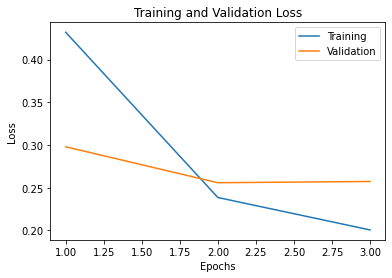

In [58]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 50, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model)

Accuracy: 0.8924815
Total Time (s): 28.65129542350769

Model Loss Trend
----------------


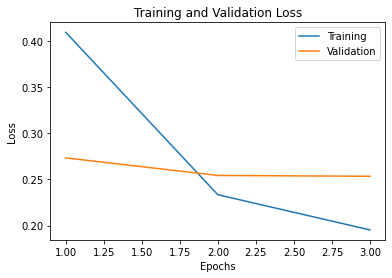

In [59]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 50, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model)

Accuracy: 0.8936502
Total Time (s): 28.425748586654663

Model Loss Trend
----------------


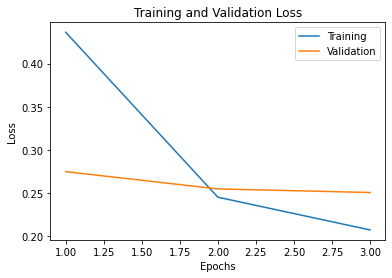

In [60]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 50, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.5))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model)

Train on 24640 samples, validate on 6160 samples
Epoch 1/3
24640/24640 [==============================] - 13s 536us/sample - loss: 0.3981 - accuracy: 0.7981 - val_loss: 0.2735 - val_accuracy: 0.8831
Epoch 2/3
24640/24640 [==============================] - 13s 508us/sample - loss: 0.2264 - accuracy: 0.9118 - val_loss: 0.2533 - val_accuracy: 0.8972
Epoch 3/3
24640/24640 [==============================] - 12s 502us/sample - loss: 0.1810 - accuracy: 0.9324 - val_loss: 0.2599 - val_accuracy: 0.8964
Accuracy: 0.8930009
Total Time (s): 38.13181519508362

Model Loss Trend
----------------


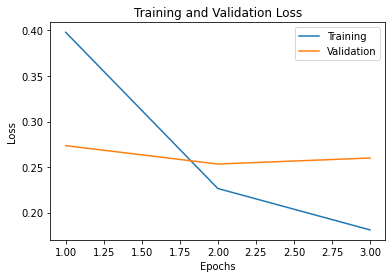

In [82]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 100, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model,3)

Train on 24640 samples, validate on 6160 samples
Epoch 1/3
24640/24640 [==============================] - 25s 1ms/sample - loss: 0.3811 - accuracy: 0.8119 - val_loss: 0.2690 - val_accuracy: 0.8865
Epoch 2/3
24640/24640 [==============================] - 23s 940us/sample - loss: 0.2202 - accuracy: 0.9148 - val_loss: 0.2555 - val_accuracy: 0.9005
Epoch 3/3
24640/24640 [==============================] - 23s 950us/sample - loss: 0.1717 - accuracy: 0.9369 - val_loss: 0.2614 - val_accuracy: 0.8972
Accuracy: 0.89507854
Total Time (s): 71.67366051673889

Model Loss Trend
----------------


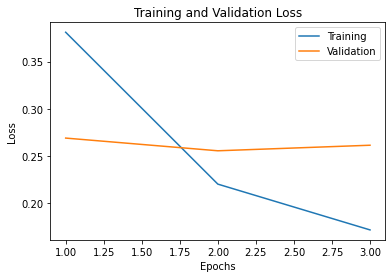

In [86]:
model = models.Sequential()

model.add(Embedding(input_dim = voc_size, output_dim = 300, input_length = X_train_seq.shape[1])) 

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.2))

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fitCNN(model,3)

## Simple RNN

In [89]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10704349477147952654
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3142752667
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4960992432301940884
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [91]:
model = models.Sequential()
model.add(Embedding(input_dim = voc_size, output_dim = 300, input_length = X_train_seq.shape[1]))
model.add(SimpleRNN(units=32,activation='tanh',use_bias=True))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_217 (Embedding)    (None, 299, 300)          3000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                10656     
_________________________________________________________________
dense_449 (Dense)            (None, 1)                 33        
Total params: 3,010,689
Trainable params: 3,010,689
Non-trainable params: 0
_________________________________________________________________


In [92]:
rnn_results = pd.DataFrame(columns=['Model','RNN Units','Embed Dims','Time','Test Accuracy'])

RNN Units: 1
--------------------------
Train on 24640 samples, validate on 6160 samples
Epoch 1/5
24640/24640 [==============================] - 123s 5ms/sample - loss: 0.5094 - accuracy: 0.7722 - val_loss: 0.4470 - val_accuracy: 0.8169
Epoch 2/5
24640/24640 [==============================] - 126s 5ms/sample - loss: 0.4286 - accuracy: 0.8243 - val_loss: 0.4262 - val_accuracy: 0.8253
Epoch 3/5
24640/24640 [==============================] - 124s 5ms/sample - loss: 0.3995 - accuracy: 0.8401 - val_loss: 0.4301 - val_accuracy: 0.8218
Epoch 4/5
24640/24640 [==============================] - 128s 5ms/sample - loss: 0.3821 - accuracy: 0.8472 - val_loss: 0.4244 - val_accuracy: 0.8239
Epoch 5/5
24640/24640 [==============================] - 126s 5ms/sample - loss: 0.3631 - accuracy: 0.8587 - val_loss: 0.4755 - val_accuracy: 0.7922
Accuracy: 0.7856123
Total Time (s): 627.392578125

Model Loss Trend
----------------


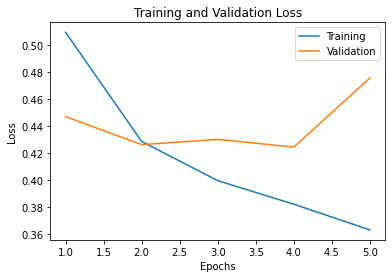


INFO:tensorflow:Assets written to: RNN_1_Units_300_Dims_Embedding_Layers\assets

RNN Units: 2
--------------------------
Train on 24640 samples, validate on 6160 samples
Epoch 1/5
24640/24640 [==============================] - 143s 6ms/sample - loss: 0.5420 - accuracy: 0.7546 - val_loss: 0.4992 - val_accuracy: 0.7867
Epoch 2/5
24640/24640 [==============================] - 143s 6ms/sample - loss: 0.4409 - accuracy: 0.8164 - val_loss: 0.4529 - val_accuracy: 0.8081
Epoch 3/5
24640/24640 [==============================] - 141s 6ms/sample - loss: 0.3937 - accuracy: 0.8390 - val_loss: 0.4734 - val_accuracy: 0.7935
Epoch 4/5
24640/24640 [==============================] - 123s 5ms/sample - loss: 0.3655 - accuracy: 0.8514 - val_loss: 0.4428 - val_accuracy: 0.8170
Epoch 5/5
24640/24640 [==============================] - 127s 5ms/sample - loss: 0.3398 - accuracy: 0.8636 - val_loss: 0.4579 - val_accuracy: 0.8110
Accuracy: 0.8052201
Total Time (s): 677.094663143158

Model Loss Trend
-------------

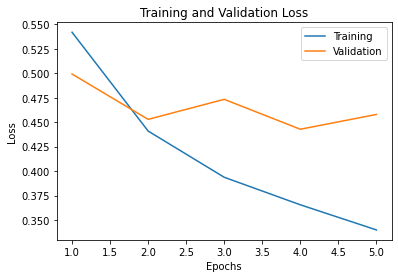


INFO:tensorflow:Assets written to: RNN_2_Units_300_Dims_Embedding_Layers\assets

RNN Units: 4
--------------------------
Train on 24640 samples, validate on 6160 samples
Epoch 1/5
24640/24640 [==============================] - 126s 5ms/sample - loss: 0.5421 - accuracy: 0.7221 - val_loss: 0.4273 - val_accuracy: 0.8222
Epoch 2/5
24640/24640 [==============================] - 124s 5ms/sample - loss: 0.3964 - accuracy: 0.8355 - val_loss: 0.3893 - val_accuracy: 0.8401
Epoch 3/5
24640/24640 [==============================] - 124s 5ms/sample - loss: 0.3368 - accuracy: 0.8655 - val_loss: 0.4590 - val_accuracy: 0.8106
Epoch 4/5
24640/24640 [==============================] - 127s 5ms/sample - loss: 0.2975 - accuracy: 0.8847 - val_loss: 0.3595 - val_accuracy: 0.8568
Epoch 5/5
24640/24640 [==============================] - 126s 5ms/sample - loss: 0.2628 - accuracy: 0.9029 - val_loss: 0.4227 - val_accuracy: 0.8279
Accuracy: 0.8209323
Total Time (s): 626.9071636199951

Model Loss Trend
------------

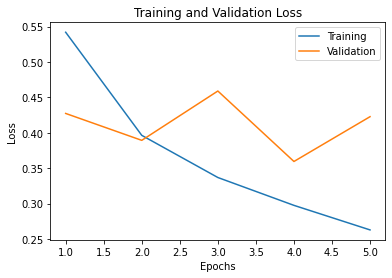


INFO:tensorflow:Assets written to: RNN_4_Units_300_Dims_Embedding_Layers\assets



In [98]:
for RNN_units in [1,2,4]:
    
    dims = 300

    start_time = time.time()

    print('RNN Units:',RNN_units)
    print('--------------------------')

    seed(5)
    tf.random.set_seed(5)

    model = models.Sequential()
    model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))
    model.add(SimpleRNN(units=RNN_units,activation='tanh',use_bias=True))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_seq, y_train, epochs=5, validation_split=0.2, verbose=True)

    total_time = time.time() - start_time

    loss, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

    print('Accuracy:',accuracy)
    print('Total Time (s):',total_time)
    print()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    print('Model Loss Trend')
    print('----------------')
    plot = plt.plot(range(1, len(acc) + 1), history.history['loss'], label = 'Training')
    plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_loss'], label = 'Validation')
    plot = plt.title('Training and Validation Loss')
    plot = plt.xlabel('Epochs')
    plot = plt.ylabel('Loss')
    plot = plt.legend()
    plt.show()
    print()

    model_name = 'RNN_'+str(RNN_units)+'_Units_'+str(dims)+'_Dims_Embedding_Layers'

    model.save(model_name)
    print()

    rnn_results = rnn_results.append(
        {'Model':model_name,
         'RNN Units':RNN_units,
         'Embed_Dims':dims,
         'Time':total_time,
         'Test Accuracy':accuracy}, ignore_index=True)

In [ ]:
rnn_results.to_csv('RNN_Results.csv')
rnn_results